# Learning Curve
In this notebook we investigate the relationship between how much data we use to train the model and vs validation accuracy. The volume of data given for training is controlled by the variable "training_months" and corresponds to how many months worth of race data we use to build the model.

We will perform this investigation using two training methods
1. The default lightgbm model

2. Cross validation to determine the optimal number of boosting iterations

In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import os
import pickle
from timeit import default_timer as timer
from datetime import date, datetime, timezone
from dateutil.relativedelta import relativedelta
from dateutil import parser
import traceback

from dogs import modelling

In [2]:
DATA_DIR = '../data'

First lets read in the data

In [3]:
modelling_data = pd.read_csv(os.path.join(DATA_DIR, 'modelling_data_25days.csv'), index_col = 'race_id')
modelling_data

,date_time,winning_box,benchmark,min_time_1,min_time_2,min_time_3,min_time_4,min_time_5,min_time_6,avg_time_1,...,pcnt_place_3,pcnt_place_4,pcnt_place_5,pcnt_place_6,pcnt_show_1,pcnt_show_2,pcnt_show_3,pcnt_show_4,pcnt_show_5,pcnt_show_6
race_id,,,,,,,,,,,,,,,,,,,,,
2539774,2008-11-15 20:58:00+00:00,5,2,29.08,28.95,29.13,28.89,28.76,29.74,29.176667,...,0.5,0.500000,1.0,0.000000,0.666667,1.000000,0.500000,0.500000,1.0,0.000000
2539775,2008-11-15 21:14:00+00:00,2,1,29.11,29.10,29.25,29.13,29.10,29.02,29.120000,...,0.0,0.500000,0.0,0.333333,0.333333,1.000000,0.666667,0.500000,0.0,0.666667
2851623,2010-08-30 10:07:00+00:00,4,5,30.02,29.95,30.74,30.23,29.84,29.78,30.415000,...,0.0,0.000000,0.5,0.333333,0.500000,0.000000,0.000000,0.000000,0.5,1.000000
2851624,2010-08-30 10:23:00+00:00,3,4,29.99,30.11,30.11,29.53,29.71,29.71,30.117500,...,0.0,0.666667,1.0,0.666667,0.000000,0.000000,0.000000,0.666667,1.0,0.666667
2539777,2008-11-15 21:45:00+00:00,0,1,NaN,NaN,31.08,NaN,30.32,29.47,NaN,...,0.0,NaN,0.0,1.000000,NaN,NaN,0.000000,NaN,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539765,2008-11-15 18:38:00+00:00,0,5,28.85,29.00,29.13,29.10,29.50,28.87,28.865000,...,0.5,0.500000,0.0,0.333333,1.000000,0.666667,0.500000,0.750000,0.0,0.333333
2539766,2008-11-15 18:56:00+00:00,3,2,28.89,29.44,29.55,29.43,29.67,29.04,29.193333,...,0.0,0.000000,0.0,0.500000,1.000000,0.000000,0.000000,0.000000,0.0,0.500000
2539767,2008-11-15 19:11:00+00:00,5,5,29.65,29.71,30.10,29.52,29.95,29.56,29.890000,...,0.5,0.500000,0.0,0.333333,0.333333,0.500000,0.750000,0.500000,0.0,0.666667


Next lets create a range of training month options that we'll use to build various models

In [4]:
training_month_options = list(range(10, 190, 10))
training_month_options

[10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180]

# Default Model

In [5]:
results_default = {}
for training_months in training_month_options:
    print(f"training_months = {training_months}")
    results_default[training_months] = modelling(modelling_data, training_months = training_months, method = 'default')

training_months = 10
data starts at 2002-01-03 18:09:00+00:00
Building model for 2018:1
Train shape:  (2204, 48)
Test shape:  (282, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.170 Benchmark correct 0.287
Building model for 2018:2
Train shape:  (2251, 48)
Test shape:  (222, 48)
The following columns will be us

perform_modelling encountered an error for 2018: 10
Building model for 2018:11
Train shape:  (2231, 48)
Test shape:  (208, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']


Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

Model correct: 0.183 Benchmark correct 0.332
Building model for 2018:12
Train shape:  (2157, 48)
Test shape:  (209, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.177 Benchmark correct 0.287
                   test_date  model_accuracy  benchmark_accuracy  \
0  2018-01-01 00:00:00+00:00        0.170213          

Model correct: 0.176 Benchmark correct 0.244
Building model for 2018:8
Train shape:  (4621, 48)
Test shape:  (215, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.177 Benchmark correct 0.242
Building model for 2018:9
Train shape:  (4657, 48)
Test shape:  (227, 48)
The following columns will be used in the modelli

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

Model correct: 0.192 Benchmark correct 0.332
Building model for 2018:12
Train shape:  (4408, 48)
Test shape:  (209, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.206 Benchmark correct 0.287
                   test_date  model_accuracy  benchmark_accuracy  \
0  2018-01-01 00:00:00+00:00        0.198582          

Model correct: 0.220 Benchmark correct 0.244
Building model for 2018:8
Train shape:  (5895, 48)
Test shape:  (215, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.214 Benchmark correct 0.242
Building model for 2018:9
Train shape:  (5947, 48)
Test shape:  (227, 48)
The following columns will be used in the modelli

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

Model correct: 0.173 Benchmark correct 0.332
Building model for 2018:12
Train shape:  (5839, 48)
Test shape:  (209, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.177 Benchmark correct 0.287
                   test_date  model_accuracy  benchmark_accuracy  \
0  2018-01-01 00:00:00+00:00        0.159574          

Model correct: 0.200 Benchmark correct 0.244
Building model for 2018:8
Train shape:  (7685, 48)
Test shape:  (215, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.158 Benchmark correct 0.242
Building model for 2018:9
Train shape:  (7715, 48)
Test shape:  (227, 48)
The following columns will be used in the modelli

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

Model correct: 0.159 Benchmark correct 0.332
Building model for 2018:12
Train shape:  (7634, 48)
Test shape:  (209, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.201 Benchmark correct 0.287
                   test_date  model_accuracy  benchmark_accuracy  \
0  2018-01-01 00:00:00+00:00        0.195035          

Model correct: 0.196 Benchmark correct 0.244
Building model for 2018:8
Train shape:  (9485, 48)
Test shape:  (215, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.200 Benchmark correct 0.242
Building model for 2018:9
Train shape:  (9528, 48)
Test shape:  (227, 48)
The following columns will be used in the modelli

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

Model correct: 0.212 Benchmark correct 0.332
Building model for 2018:12
Train shape:  (9402, 48)
Test shape:  (209, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.182 Benchmark correct 0.287
                   test_date  model_accuracy  benchmark_accuracy  \
0  2018-01-01 00:00:00+00:00        0.191489          

Model correct: 0.200 Benchmark correct 0.244
Building model for 2018:8
Train shape:  (11305, 48)
Test shape:  (215, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.186 Benchmark correct 0.242
Building model for 2018:9
Train shape:  (11332, 48)
Test shape:  (227, 48)
The following columns will be used in the model

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

Model correct: 0.183 Benchmark correct 0.332
Building model for 2018:12
Train shape:  (11214, 48)
Test shape:  (209, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.201 Benchmark correct 0.287
                   test_date  model_accuracy  benchmark_accuracy  \
0  2018-01-01 00:00:00+00:00        0.145390         

Model correct: 0.208 Benchmark correct 0.244
Building model for 2018:8
Train shape:  (13078, 48)
Test shape:  (215, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.191 Benchmark correct 0.242
Building model for 2018:9
Train shape:  (13128, 48)
Test shape:  (227, 48)
The following columns will be used in the model

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

Model correct: 0.183 Benchmark correct 0.332
Building model for 2018:12
Train shape:  (12999, 48)
Test shape:  (209, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.187 Benchmark correct 0.287
                   test_date  model_accuracy  benchmark_accuracy  \
0  2018-01-01 00:00:00+00:00        0.145390         

Model correct: 0.184 Benchmark correct 0.244
Building model for 2018:8
Train shape:  (14732, 48)
Test shape:  (215, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.153 Benchmark correct 0.242
Building model for 2018:9
Train shape:  (14780, 48)
Test shape:  (227, 48)
The following columns will be used in the model

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

Model correct: 0.183 Benchmark correct 0.332
Building model for 2018:12
Train shape:  (14725, 48)
Test shape:  (209, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.225 Benchmark correct 0.287
                   test_date  model_accuracy  benchmark_accuracy  \
0  2018-01-01 00:00:00+00:00        0.163121         

Model correct: 0.188 Benchmark correct 0.244
Building model for 2018:8
Train shape:  (16399, 48)
Test shape:  (215, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.163 Benchmark correct 0.242
Building model for 2018:9
Train shape:  (16470, 48)
Test shape:  (227, 48)
The following columns will be used in the model

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

Model correct: 0.178 Benchmark correct 0.332
Building model for 2018:12
Train shape:  (16407, 48)
Test shape:  (209, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.187 Benchmark correct 0.287
                   test_date  model_accuracy  benchmark_accuracy  \
0  2018-01-01 00:00:00+00:00        0.195035         

Model correct: 0.188 Benchmark correct 0.244
Building model for 2018:8
Train shape:  (18137, 48)
Test shape:  (215, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.205 Benchmark correct 0.242
Building model for 2018:9
Train shape:  (18172, 48)
Test shape:  (227, 48)
The following columns will be used in the model

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

Model correct: 0.197 Benchmark correct 0.332
Building model for 2018:12
Train shape:  (18105, 48)
Test shape:  (209, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.196 Benchmark correct 0.287
                   test_date  model_accuracy  benchmark_accuracy  \
0  2018-01-01 00:00:00+00:00        0.202128         

Model correct: 0.148 Benchmark correct 0.244
Building model for 2018:8
Train shape:  (19762, 48)
Test shape:  (215, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.209 Benchmark correct 0.242
Building model for 2018:9
Train shape:  (19815, 48)
Test shape:  (227, 48)
The following columns will be used in the model

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

Model correct: 0.192 Benchmark correct 0.332
Building model for 2018:12
Train shape:  (19735, 48)
Test shape:  (209, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.244 Benchmark correct 0.287
                   test_date  model_accuracy  benchmark_accuracy  \
0  2018-01-01 00:00:00+00:00        0.219858         

Model correct: 0.172 Benchmark correct 0.244
Building model for 2018:8
Train shape:  (21509, 48)
Test shape:  (215, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.209 Benchmark correct 0.242
Building model for 2018:9
Train shape:  (21536, 48)
Test shape:  (227, 48)
The following columns will be used in the model

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

Model correct: 0.207 Benchmark correct 0.332
Building model for 2018:12
Train shape:  (21428, 48)
Test shape:  (209, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.196 Benchmark correct 0.287
                   test_date  model_accuracy  benchmark_accuracy  \
0  2018-01-01 00:00:00+00:00        0.191489         

Model correct: 0.144 Benchmark correct 0.244
Building model for 2018:8
Train shape:  (23321, 48)
Test shape:  (215, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.233 Benchmark correct 0.242
Building model for 2018:9
Train shape:  (23338, 48)
Test shape:  (227, 48)
The following columns will be used in the model

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

Model correct: 0.207 Benchmark correct 0.332
Building model for 2018:12
Train shape:  (23225, 48)
Test shape:  (209, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.239 Benchmark correct 0.287
                   test_date  model_accuracy  benchmark_accuracy  \
0  2018-01-01 00:00:00+00:00        0.152482         

Model correct: 0.180 Benchmark correct 0.244
Building model for 2018:8
Train shape:  (25138, 48)
Test shape:  (215, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.223 Benchmark correct 0.242
Building model for 2018:9
Train shape:  (25145, 48)
Test shape:  (227, 48)
The following columns will be used in the model

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

Model correct: 0.212 Benchmark correct 0.332
Building model for 2018:12
Train shape:  (25064, 48)
Test shape:  (209, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.244 Benchmark correct 0.287
                   test_date  model_accuracy  benchmark_accuracy  \
0  2018-01-01 00:00:00+00:00        0.187943         

Model correct: 0.152 Benchmark correct 0.244
Building model for 2018:8
Train shape:  (27038, 48)
Test shape:  (215, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.153 Benchmark correct 0.242
Building model for 2018:9
Train shape:  (27091, 48)
Test shape:  (227, 48)
The following columns will be used in the model

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

Model correct: 0.202 Benchmark correct 0.332
Building model for 2018:12
Train shape:  (26966, 48)
Test shape:  (209, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.196 Benchmark correct 0.287
                   test_date  model_accuracy  benchmark_accuracy  \
0  2018-01-01 00:00:00+00:00        0.187943         

Model correct: 0.208 Benchmark correct 0.244
Building model for 2018:8
Train shape:  (28922, 48)
Test shape:  (215, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.195 Benchmark correct 0.242
Building model for 2018:9
Train shape:  (28949, 48)
Test shape:  (227, 48)
The following columns will be used in the model

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

Model correct: 0.202 Benchmark correct 0.332
Building model for 2018:12
Train shape:  (28833, 48)
Test shape:  (209, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.220 Benchmark correct 0.287
                   test_date  model_accuracy  benchmark_accuracy  \
0  2018-01-01 00:00:00+00:00        0.180851         

Model correct: 0.200 Benchmark correct 0.244
Building model for 2018:8
Train shape:  (30904, 48)
Test shape:  (215, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.195 Benchmark correct 0.242
Building model for 2018:9
Train shape:  (30921, 48)
Test shape:  (227, 48)
The following columns will be used in the model

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

Model correct: 0.226 Benchmark correct 0.332
Building model for 2018:12
Train shape:  (30721, 48)
Test shape:  (209, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.244 Benchmark correct 0.287
                   test_date  model_accuracy  benchmark_accuracy  \
0  2018-01-01 00:00:00+00:00        0.170213         

Model correct: 0.228 Benchmark correct 0.244
Building model for 2018:8
Train shape:  (32775, 48)
Test shape:  (215, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.177 Benchmark correct 0.242
Building model for 2018:9
Train shape:  (32814, 48)
Test shape:  (227, 48)
The following columns will be used in the model

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

Model correct: 0.183 Benchmark correct 0.332
Building model for 2018:12
Train shape:  (32698, 48)
Test shape:  (209, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
Model correct: 0.258 Benchmark correct 0.287
                   test_date  model_accuracy  benchmark_accuracy  \
0  2018-01-01 00:00:00+00:00        0.141844         

In [6]:
learning_curve_default = pd.DataFrame.from_dict(results_default, orient = 'index', columns = ['Model', 'Benchmark', 'Races', 'Features', 'Training Time'])
learning_curve_default

,Model,Benchmark,Races,Features,Training Time
10,0.174471,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",12.329937
20,0.187311,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",13.403444
30,0.183912,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",14.289901
40,0.182779,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",15.090551
50,0.191843,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",15.904832
60,0.186178,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",16.670036
70,0.180891,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",17.324283
80,0.180514,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",17.946499
90,0.179758,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",18.581993
100,0.184668,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",19.389442


<AxesSubplot:>

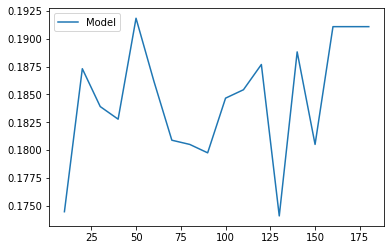

In [7]:
learning_curve_default.plot(y = 'Model')

The plot seems to exhibit a lot of noise

# Cross Validation Model

In [8]:
results_cv = {}
for training_months in training_month_options:
    print(f"training_months = {training_months}")
    results_cv[training_months] = modelling(modelling_data, training_months = training_months, method = 'cv')
    
learning_curve_cv = pd.DataFrame.from_dict(results_cv, orient = 'index', columns = ['Model', 'Benchmark', 'Races', 'Features', 'Training Time'])
learning_curve_cv

training_months = 10
data starts at 2002-01-03 18:09:00+00:00
Building model for 2018:1
Train shape:  (2204, 48)
Test shape:  (282, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
[1]	cv_agg's accuracy: 0.171509 + 0.0100429
[2]	cv_agg's accuracy: 0.168324 + 0.0118654
[3]	cv_agg's accuracy: 0.163791 + 0.00454876
[4]	cv_agg's accur

[9]	cv_agg's accuracy: 0.188 + 0.0231197
[10]	cv_agg's accuracy: 0.186222 + 0.0154856
[11]	cv_agg's accuracy: 0.189778 + 0.0171327
[12]	cv_agg's accuracy: 0.193333 + 0.0155873
[13]	cv_agg's accuracy: 0.192889 + 0.0172934
[14]	cv_agg's accuracy: 0.193333 + 0.0164504
[15]	cv_agg's accuracy: 0.191556 + 0.0167715
[16]	cv_agg's accuracy: 0.189333 + 0.0139417
[17]	cv_agg's accuracy: 0.191111 + 0.0152023
[18]	cv_agg's accuracy: 0.192 + 0.0149798
[19]	cv_agg's accuracy: 0.193778 + 0.0129881
[20]	cv_agg's accuracy: 0.192 + 0.0123808
[21]	cv_agg's accuracy: 0.190222 + 0.00938609
[22]	cv_agg's accuracy: 0.189333 + 0.0107405
[23]	cv_agg's accuracy: 0.190222 + 0.0120575
[24]	cv_agg's accuracy: 0.192889 + 0.0121228
[25]	cv_agg's accuracy: 0.192889 + 0.0133629
[26]	cv_agg's accuracy: 0.188444 + 0.0144973
[27]	cv_agg's accuracy: 0.193333 + 0.0171558
[28]	cv_agg's accuracy: 0.191556 + 0.0179106
[29]	cv_agg's accuracy: 0.192 + 0.0183572
[30]	cv_agg's accuracy: 0.188444 + 0.022151
[31]	cv_agg's accuracy:

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

[4]	cv_agg's accuracy: 0.184212 + 0.0166083
[5]	cv_agg's accuracy: 0.184209 + 0.0179627
[6]	cv_agg's accuracy: 0.177486 + 0.0151926
[7]	cv_agg's accuracy: 0.175691 + 0.0188437
[8]	cv_agg's accuracy: 0.178827 + 0.0209825
[9]	cv_agg's accuracy: 0.171217 + 0.0125551
[10]	cv_agg's accuracy: 0.174358 + 0.00508
[11]	cv_agg's accuracy: 0.173009 + 0.010219
[12]	cv_agg's accuracy: 0.172112 + 0.0100127
[13]	cv_agg's accuracy: 0.173906 + 0.0105364
[14]	cv_agg's accuracy: 0.166294 + 0.00659157
[15]	cv_agg's accuracy: 0.167635 + 0.00615736
[16]	cv_agg's accuracy: 0.170323 + 0.00669603
[17]	cv_agg's accuracy: 0.171221 + 0.00321903
[18]	cv_agg's accuracy: 0.170769 + 0.0094225
[19]	cv_agg's accuracy: 0.170316 + 0.0125139
[20]	cv_agg's accuracy: 0.173005 + 0.0157951
[21]	cv_agg's accuracy: 0.173903 + 0.0124893
1
The maxium accuracy on the validation set was 0.18468
The ideal number of iterations was 1.
Model correct: 0.144 Benchmark correct 0.332
Building model for 2018:12
Train shape:  (2157, 48)
Test

[23]	cv_agg's accuracy: 0.181963 + 0.00560339
[24]	cv_agg's accuracy: 0.176533 + 0.00396389
[25]	cv_agg's accuracy: 0.17762 + 0.0080965
[26]	cv_agg's accuracy: 0.181692 + 0.00819912
[27]	cv_agg's accuracy: 0.179248 + 0.0103022
[28]	cv_agg's accuracy: 0.180336 + 0.00945892
[29]	cv_agg's accuracy: 0.175989 + 0.0107742
[30]	cv_agg's accuracy: 0.173547 + 0.00699938
[31]	cv_agg's accuracy: 0.175447 + 0.00932537
[32]	cv_agg's accuracy: 0.176532 + 0.0109666
[33]	cv_agg's accuracy: 0.180334 + 0.00941398
[34]	cv_agg's accuracy: 0.180334 + 0.00885672
[35]	cv_agg's accuracy: 0.181421 + 0.0134699
[36]	cv_agg's accuracy: 0.184135 + 0.0148227
16
The maxium accuracy on the validation set was 0.18604
The ideal number of iterations was 16.
Model correct: 0.176 Benchmark correct 0.261
Building model for 2018:3
Train shape:  (3714, 48)
Test shape:  (230, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' '

[1]	cv_agg's accuracy: 0.185342 + 0.0110258
[2]	cv_agg's accuracy: 0.182308 + 0.00837898
[3]	cv_agg's accuracy: 0.176471 + 0.00984368
[4]	cv_agg's accuracy: 0.176238 + 0.0069126
[5]	cv_agg's accuracy: 0.177174 + 0.00706109
[6]	cv_agg's accuracy: 0.178342 + 0.0111723
[7]	cv_agg's accuracy: 0.184876 + 0.00735374
[8]	cv_agg's accuracy: 0.182075 + 0.00535993
[9]	cv_agg's accuracy: 0.182543 + 0.00687095
[10]	cv_agg's accuracy: 0.176707 + 0.00755576
[11]	cv_agg's accuracy: 0.178341 + 0.00781555
[12]	cv_agg's accuracy: 0.18254 + 0.00581545
[13]	cv_agg's accuracy: 0.182074 + 0.00552035
[14]	cv_agg's accuracy: 0.179274 + 0.00726856
[15]	cv_agg's accuracy: 0.175305 + 0.00692674
[16]	cv_agg's accuracy: 0.176703 + 0.00455071
[17]	cv_agg's accuracy: 0.180906 + 0.00321792
[18]	cv_agg's accuracy: 0.179737 + 0.006675
[19]	cv_agg's accuracy: 0.178337 + 0.00353323
[20]	cv_agg's accuracy: 0.179739 + 0.00448979
[21]	cv_agg's accuracy: 0.182074 + 0.00620795
1
The maxium accuracy on the validation set was 0

[15]	cv_agg's accuracy: 0.174978 + 0.0079291
[16]	cv_agg's accuracy: 0.17519 + 0.0106287
[17]	cv_agg's accuracy: 0.174334 + 0.0064985
[18]	cv_agg's accuracy: 0.174116 + 0.0060817
[19]	cv_agg's accuracy: 0.17347 + 0.00815652
[20]	cv_agg's accuracy: 0.174545 + 0.0076042
[21]	cv_agg's accuracy: 0.175189 + 0.00837041
[22]	cv_agg's accuracy: 0.17476 + 0.0063466
[23]	cv_agg's accuracy: 0.174544 + 0.0101055
[24]	cv_agg's accuracy: 0.179704 + 0.00745833
4
The maxium accuracy on the validation set was 0.18271
The ideal number of iterations was 4.
perform_modelling encountered an error for 2018: 10
Building model for 2018:11
Train shape:  (4435, 48)
Test shape:  (208, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'a

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

[1]	cv_agg's accuracy: 0.185795 + 0.00692775
[2]	cv_agg's accuracy: 0.180383 + 0.00790786
[3]	cv_agg's accuracy: 0.180834 + 0.0107334
[4]	cv_agg's accuracy: 0.178579 + 0.00947549
[5]	cv_agg's accuracy: 0.179256 + 0.00828463
[6]	cv_agg's accuracy: 0.181511 + 0.00377299
[7]	cv_agg's accuracy: 0.174972 + 0.00681678
[8]	cv_agg's accuracy: 0.178354 + 0.00885992
[9]	cv_agg's accuracy: 0.178129 + 0.00834577
[10]	cv_agg's accuracy: 0.172492 + 0.00657379
[11]	cv_agg's accuracy: 0.179481 + 0.00544895
[12]	cv_agg's accuracy: 0.179256 + 0.00625679
[13]	cv_agg's accuracy: 0.183766 + 0.00433718
[14]	cv_agg's accuracy: 0.184442 + 0.00648032
[15]	cv_agg's accuracy: 0.182187 + 0.00749866
[16]	cv_agg's accuracy: 0.182864 + 0.00666595
[17]	cv_agg's accuracy: 0.187824 + 0.00917564
[18]	cv_agg's accuracy: 0.181736 + 0.0109862
[19]	cv_agg's accuracy: 0.18354 + 0.00658924
[20]	cv_agg's accuracy: 0.183991 + 0.00585378
[21]	cv_agg's accuracy: 0.184893 + 0.00899094
[22]	cv_agg's accuracy: 0.18354 + 0.00888857
[

[3]	cv_agg's accuracy: 0.184775 + 0.0135813
[4]	cv_agg's accuracy: 0.182582 + 0.0125557
[5]	cv_agg's accuracy: 0.181851 + 0.00594605
[6]	cv_agg's accuracy: 0.186232 + 0.00731948
[7]	cv_agg's accuracy: 0.185686 + 0.0064978
[8]	cv_agg's accuracy: 0.189883 + 0.00614191
[9]	cv_agg's accuracy: 0.1897 + 0.00597458
[10]	cv_agg's accuracy: 0.185136 + 0.00519377
[11]	cv_agg's accuracy: 0.184952 + 0.00733216
[12]	cv_agg's accuracy: 0.18842 + 0.0099334
[13]	cv_agg's accuracy: 0.191161 + 0.00597474
[14]	cv_agg's accuracy: 0.191159 + 0.00946436
[15]	cv_agg's accuracy: 0.192985 + 0.00995824
[16]	cv_agg's accuracy: 0.192254 + 0.0120948
[17]	cv_agg's accuracy: 0.192073 + 0.00934845
[18]	cv_agg's accuracy: 0.19116 + 0.0107901
[19]	cv_agg's accuracy: 0.190064 + 0.0134676
[20]	cv_agg's accuracy: 0.19116 + 0.0117004
[21]	cv_agg's accuracy: 0.192073 + 0.012371
[22]	cv_agg's accuracy: 0.192073 + 0.0117302
[23]	cv_agg's accuracy: 0.190065 + 0.00879982
[24]	cv_agg's accuracy: 0.190429 + 0.0106476
[25]	cv_agg'

[25]	cv_agg's accuracy: 0.187957 + 0.0131879
[26]	cv_agg's accuracy: 0.184741 + 0.0102988
[27]	cv_agg's accuracy: 0.185813 + 0.00931625
[28]	cv_agg's accuracy: 0.184562 + 0.0110273
8
The maxium accuracy on the validation set was 0.18903
The ideal number of iterations was 8.
Model correct: 0.152 Benchmark correct 0.270
Building model for 2018:6
Train shape:  (5708, 48)
Test shape:  (272, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_pla

[3]	cv_agg's accuracy: 0.168824 + 0.00974246
[4]	cv_agg's accuracy: 0.174205 + 0.00591749
[5]	cv_agg's accuracy: 0.175888 + 0.00838534
[6]	cv_agg's accuracy: 0.178411 + 0.00721653
[7]	cv_agg's accuracy: 0.175216 + 0.0093179
[8]	cv_agg's accuracy: 0.172693 + 0.0091205
[9]	cv_agg's accuracy: 0.172358 + 0.007919
[10]	cv_agg's accuracy: 0.174879 + 0.00535599
[11]	cv_agg's accuracy: 0.178747 + 0.00422316
[12]	cv_agg's accuracy: 0.180428 + 0.00245772
[13]	cv_agg's accuracy: 0.180596 + 0.00627085
[14]	cv_agg's accuracy: 0.179755 + 0.00673474
[15]	cv_agg's accuracy: 0.176393 + 0.00842814
[16]	cv_agg's accuracy: 0.180258 + 0.00663862
[17]	cv_agg's accuracy: 0.177232 + 0.00548194
[18]	cv_agg's accuracy: 0.181773 + 0.00630882
[19]	cv_agg's accuracy: 0.180932 + 0.00419958
[20]	cv_agg's accuracy: 0.1848 + 0.00192324
[21]	cv_agg's accuracy: 0.182108 + 0.00289137
[22]	cv_agg's accuracy: 0.181099 + 0.00335582
[23]	cv_agg's accuracy: 0.182108 + 0.00490897
[24]	cv_agg's accuracy: 0.179586 + 0.00616824
[

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

[3]	cv_agg's accuracy: 0.182335 + 0.00537801
[4]	cv_agg's accuracy: 0.185088 + 0.0063398
[5]	cv_agg's accuracy: 0.185951 + 0.00830129
[6]	cv_agg's accuracy: 0.188019 + 0.00756116
[7]	cv_agg's accuracy: 0.188363 + 0.00610076
[8]	cv_agg's accuracy: 0.188534 + 0.0062916
[9]	cv_agg's accuracy: 0.189221 + 0.00779184
[10]	cv_agg's accuracy: 0.190772 + 0.00560001
[11]	cv_agg's accuracy: 0.191117 + 0.00705482
[12]	cv_agg's accuracy: 0.190084 + 0.00572622
[13]	cv_agg's accuracy: 0.190428 + 0.00484065
[14]	cv_agg's accuracy: 0.190429 + 0.00587458
[15]	cv_agg's accuracy: 0.192323 + 0.00781324
[16]	cv_agg's accuracy: 0.190256 + 0.00616366
[17]	cv_agg's accuracy: 0.190258 + 0.010376
[18]	cv_agg's accuracy: 0.188535 + 0.00788269
[19]	cv_agg's accuracy: 0.189051 + 0.00661526
[20]	cv_agg's accuracy: 0.186124 + 0.00720952
[21]	cv_agg's accuracy: 0.188536 + 0.00936379
[22]	cv_agg's accuracy: 0.188361 + 0.00666332
[23]	cv_agg's accuracy: 0.189221 + 0.00799208
[24]	cv_agg's accuracy: 0.188704 + 0.00891164

[23]	cv_agg's accuracy: 0.195198 + 0.00451217
[24]	cv_agg's accuracy: 0.195477 + 0.00411325
[25]	cv_agg's accuracy: 0.196874 + 0.00492338
[26]	cv_agg's accuracy: 0.19478 + 0.00537719
[27]	cv_agg's accuracy: 0.19464 + 0.00502326
[28]	cv_agg's accuracy: 0.192405 + 0.00378286
[29]	cv_agg's accuracy: 0.191847 + 0.00492952
[30]	cv_agg's accuracy: 0.191568 + 0.00506342
[31]	cv_agg's accuracy: 0.192824 + 0.00619192
[32]	cv_agg's accuracy: 0.195338 + 0.00534484
[33]	cv_agg's accuracy: 0.195338 + 0.00685503
[34]	cv_agg's accuracy: 0.194221 + 0.00610294
[35]	cv_agg's accuracy: 0.193104 + 0.0073687
[36]	cv_agg's accuracy: 0.192127 + 0.00685549
[37]	cv_agg's accuracy: 0.192685 + 0.0063416
[38]	cv_agg's accuracy: 0.19436 + 0.00479881
[39]	cv_agg's accuracy: 0.192685 + 0.0058887
[40]	cv_agg's accuracy: 0.193244 + 0.00699172
[41]	cv_agg's accuracy: 0.191988 + 0.0071635
[42]	cv_agg's accuracy: 0.192406 + 0.0073445
22
The maxium accuracy on the validation set was 0.19771
The ideal number of iterations 

[3]	cv_agg's accuracy: 0.195561 + 0.0116517
[4]	cv_agg's accuracy: 0.191639 + 0.010721
[5]	cv_agg's accuracy: 0.192586 + 0.0136043
[6]	cv_agg's accuracy: 0.190287 + 0.0106324
[7]	cv_agg's accuracy: 0.193262 + 0.0112873
[8]	cv_agg's accuracy: 0.194751 + 0.0108129
[9]	cv_agg's accuracy: 0.189747 + 0.00888784
[10]	cv_agg's accuracy: 0.192452 + 0.0129665
[11]	cv_agg's accuracy: 0.187989 + 0.0145225
[12]	cv_agg's accuracy: 0.190289 + 0.0107168
[13]	cv_agg's accuracy: 0.191777 + 0.00813324
[14]	cv_agg's accuracy: 0.190018 + 0.00839254
[15]	cv_agg's accuracy: 0.189612 + 0.00799269
[16]	cv_agg's accuracy: 0.19137 + 0.00908757
[17]	cv_agg's accuracy: 0.190964 + 0.0074926
[18]	cv_agg's accuracy: 0.193805 + 0.00668593
[19]	cv_agg's accuracy: 0.194887 + 0.00792334
[20]	cv_agg's accuracy: 0.194481 + 0.00696109
[21]	cv_agg's accuracy: 0.192994 + 0.0106524
[22]	cv_agg's accuracy: 0.192453 + 0.0092546
[23]	cv_agg's accuracy: 0.190965 + 0.00889519
3
The maxium accuracy on the validation set was 0.19556

[3]	cv_agg's accuracy: 0.182761 + 0.00929278
[4]	cv_agg's accuracy: 0.184187 + 0.00718648
[5]	cv_agg's accuracy: 0.18315 + 0.0046842
[6]	cv_agg's accuracy: 0.185224 + 0.0066016
[7]	cv_agg's accuracy: 0.181594 + 0.00884254
[8]	cv_agg's accuracy: 0.178354 + 0.0100602
[9]	cv_agg's accuracy: 0.18639 + 0.00715367
[10]	cv_agg's accuracy: 0.183798 + 0.00862323
[11]	cv_agg's accuracy: 0.183539 + 0.00698494
[12]	cv_agg's accuracy: 0.186131 + 0.0049425
[13]	cv_agg's accuracy: 0.186779 + 0.00318554
[14]	cv_agg's accuracy: 0.187557 + 0.00471993
[15]	cv_agg's accuracy: 0.18652 + 0.0065505
[16]	cv_agg's accuracy: 0.185224 + 0.00926925
[17]	cv_agg's accuracy: 0.182761 + 0.00612092
[18]	cv_agg's accuracy: 0.184964 + 0.00661685
[19]	cv_agg's accuracy: 0.184576 + 0.00639476
[20]	cv_agg's accuracy: 0.185483 + 0.00391866
[21]	cv_agg's accuracy: 0.183668 + 0.00499659
[22]	cv_agg's accuracy: 0.185612 + 0.00646271
[23]	cv_agg's accuracy: 0.184576 + 0.00710418
[24]	cv_agg's accuracy: 0.18652 + 0.00795223
[25]

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

[3]	cv_agg's accuracy: 0.188454 + 0.00573532
[4]	cv_agg's accuracy: 0.181615 + 0.00335746
[5]	cv_agg's accuracy: 0.181352 + 0.00265653
[6]	cv_agg's accuracy: 0.182405 + 0.00322712
[7]	cv_agg's accuracy: 0.182798 + 0.00353982
[8]	cv_agg's accuracy: 0.18214 + 0.00427642
[9]	cv_agg's accuracy: 0.179905 + 0.00282477
[10]	cv_agg's accuracy: 0.183456 + 0.00388288
[11]	cv_agg's accuracy: 0.182799 + 0.00173361
[12]	cv_agg's accuracy: 0.184376 + 0.00252909
[13]	cv_agg's accuracy: 0.185165 + 0.00413874
[14]	cv_agg's accuracy: 0.187794 + 0.00780522
[15]	cv_agg's accuracy: 0.188321 + 0.00804188
[16]	cv_agg's accuracy: 0.190556 + 0.00886707
[17]	cv_agg's accuracy: 0.188716 + 0.00555186
[18]	cv_agg's accuracy: 0.190952 + 0.00455806
[19]	cv_agg's accuracy: 0.190294 + 0.00608782
[20]	cv_agg's accuracy: 0.189768 + 0.00520914
[21]	cv_agg's accuracy: 0.188979 + 0.00470573
[22]	cv_agg's accuracy: 0.190425 + 0.00726362
[23]	cv_agg's accuracy: 0.188848 + 0.00547629
[24]	cv_agg's accuracy: 0.19003 + 0.007281

[28]	cv_agg's accuracy: 0.194557 + 0.00968612
[29]	cv_agg's accuracy: 0.197903 + 0.00611426
[30]	cv_agg's accuracy: 0.195784 + 0.00684387
[31]	cv_agg's accuracy: 0.195672 + 0.00702692
[32]	cv_agg's accuracy: 0.193106 + 0.00791735
[33]	cv_agg's accuracy: 0.190987 + 0.00876677
[34]	cv_agg's accuracy: 0.190986 + 0.0074423
[35]	cv_agg's accuracy: 0.190987 + 0.00717625
[36]	cv_agg's accuracy: 0.18842 + 0.0064779
[37]	cv_agg's accuracy: 0.189982 + 0.0072386
[38]	cv_agg's accuracy: 0.189759 + 0.00669796
[39]	cv_agg's accuracy: 0.191209 + 0.00456453
[40]	cv_agg's accuracy: 0.19199 + 0.00548239
[41]	cv_agg's accuracy: 0.192325 + 0.00454046
[42]	cv_agg's accuracy: 0.191432 + 0.00458551
[43]	cv_agg's accuracy: 0.189424 + 0.00341879
[44]	cv_agg's accuracy: 0.188198 + 0.0038266
[45]	cv_agg's accuracy: 0.189647 + 0.00329037
[46]	cv_agg's accuracy: 0.190317 + 0.00444518
[47]	cv_agg's accuracy: 0.187528 + 0.0038693
[48]	cv_agg's accuracy: 0.186413 + 0.00513003
[49]	cv_agg's accuracy: 0.186524 + 0.0039

[25]	cv_agg's accuracy: 0.189954 + 0.00480654
[26]	cv_agg's accuracy: 0.190611 + 0.00469289
[27]	cv_agg's accuracy: 0.190064 + 0.00537096
[28]	cv_agg's accuracy: 0.189079 + 0.0052184
[29]	cv_agg's accuracy: 0.190064 + 0.00616506
[30]	cv_agg's accuracy: 0.189408 + 0.00551886
[31]	cv_agg's accuracy: 0.188532 + 0.0058505
[32]	cv_agg's accuracy: 0.190283 + 0.00618382
[33]	cv_agg's accuracy: 0.189955 + 0.0073943
[34]	cv_agg's accuracy: 0.188971 + 0.00743082
[35]	cv_agg's accuracy: 0.189408 + 0.00544168
[36]	cv_agg's accuracy: 0.190502 + 0.00609348
[37]	cv_agg's accuracy: 0.192362 + 0.00680019
[38]	cv_agg's accuracy: 0.191378 + 0.00733182
[39]	cv_agg's accuracy: 0.190174 + 0.00540996
[40]	cv_agg's accuracy: 0.190284 + 0.00592849
[41]	cv_agg's accuracy: 0.190393 + 0.00535754
[42]	cv_agg's accuracy: 0.191487 + 0.00468301
[43]	cv_agg's accuracy: 0.190174 + 0.00484993
23
The maxium accuracy on the validation set was 0.19335
The ideal number of iterations was 23.
Model correct: 0.139 Benchmark co

[1]	cv_agg's accuracy: 0.193358 + 0.00676231
[2]	cv_agg's accuracy: 0.193042 + 0.00798347
[3]	cv_agg's accuracy: 0.192936 + 0.00455915
[4]	cv_agg's accuracy: 0.192831 + 0.00504963
[5]	cv_agg's accuracy: 0.194623 + 0.00949101
[6]	cv_agg's accuracy: 0.191671 + 0.00989916
[7]	cv_agg's accuracy: 0.194834 + 0.0096259
[8]	cv_agg's accuracy: 0.191882 + 0.00718934
[9]	cv_agg's accuracy: 0.194623 + 0.00867091
[10]	cv_agg's accuracy: 0.192304 + 0.0119345
[11]	cv_agg's accuracy: 0.194412 + 0.0107538
[12]	cv_agg's accuracy: 0.194939 + 0.0123555
[13]	cv_agg's accuracy: 0.194623 + 0.0120412
[14]	cv_agg's accuracy: 0.192093 + 0.0114409
[15]	cv_agg's accuracy: 0.192725 + 0.0118185
[16]	cv_agg's accuracy: 0.190511 + 0.0125084
[17]	cv_agg's accuracy: 0.192831 + 0.0116135
[18]	cv_agg's accuracy: 0.191355 + 0.010421
[19]	cv_agg's accuracy: 0.190722 + 0.0131318
[20]	cv_agg's accuracy: 0.188614 + 0.0106864
[21]	cv_agg's accuracy: 0.1864 + 0.0114506
[22]	cv_agg's accuracy: 0.185978 + 0.00942048
[23]	cv_agg's

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

[3]	cv_agg's accuracy: 0.187267 + 0.0060163
[4]	cv_agg's accuracy: 0.185031 + 0.00544875
[5]	cv_agg's accuracy: 0.188118 + 0.00382405
[6]	cv_agg's accuracy: 0.188544 + 0.00543721
[7]	cv_agg's accuracy: 0.187054 + 0.0081332
[8]	cv_agg's accuracy: 0.18567 + 0.00934638
[9]	cv_agg's accuracy: 0.184285 + 0.0079174
[10]	cv_agg's accuracy: 0.183647 + 0.00498003
[11]	cv_agg's accuracy: 0.185243 + 0.00987557
[12]	cv_agg's accuracy: 0.186095 + 0.00658323
[13]	cv_agg's accuracy: 0.18897 + 0.00800242
[14]	cv_agg's accuracy: 0.187905 + 0.00721942
[15]	cv_agg's accuracy: 0.18865 + 0.00624071
[16]	cv_agg's accuracy: 0.187798 + 0.00617477
[17]	cv_agg's accuracy: 0.187053 + 0.00601301
[18]	cv_agg's accuracy: 0.186095 + 0.00607788
[19]	cv_agg's accuracy: 0.185883 + 0.00457746
[20]	cv_agg's accuracy: 0.18748 + 0.00554581
[21]	cv_agg's accuracy: 0.188331 + 0.00853719
[22]	cv_agg's accuracy: 0.187692 + 0.0096052
[23]	cv_agg's accuracy: 0.187798 + 0.00851106
[24]	cv_agg's accuracy: 0.187692 + 0.00738255
[25

[14]	cv_agg's accuracy: 0.200764 + 0.005539
[15]	cv_agg's accuracy: 0.202346 + 0.00784005
[16]	cv_agg's accuracy: 0.201694 + 0.00453043
[17]	cv_agg's accuracy: 0.204859 + 0.00655377
[18]	cv_agg's accuracy: 0.203091 + 0.00642791
[19]	cv_agg's accuracy: 0.20309 + 0.00663939
[20]	cv_agg's accuracy: 0.203741 + 0.00820068
[21]	cv_agg's accuracy: 0.202531 + 0.00870346
[22]	cv_agg's accuracy: 0.204114 + 0.00879117
[23]	cv_agg's accuracy: 0.202904 + 0.00999871
[24]	cv_agg's accuracy: 0.202718 + 0.00773243
[25]	cv_agg's accuracy: 0.205603 + 0.0066324
[26]	cv_agg's accuracy: 0.207465 + 0.00866695
[27]	cv_agg's accuracy: 0.205323 + 0.00892357
[28]	cv_agg's accuracy: 0.205137 + 0.00848318
[29]	cv_agg's accuracy: 0.206626 + 0.00878093
[30]	cv_agg's accuracy: 0.20672 + 0.00857705
[31]	cv_agg's accuracy: 0.206627 + 0.00809195
[32]	cv_agg's accuracy: 0.20551 + 0.00779925
[33]	cv_agg's accuracy: 0.20281 + 0.00818598
[34]	cv_agg's accuracy: 0.204021 + 0.00873898
[35]	cv_agg's accuracy: 0.203556 + 0.0087

[2]	cv_agg's accuracy: 0.182714 + 0.00554681
[3]	cv_agg's accuracy: 0.18399 + 0.00487601
[4]	cv_agg's accuracy: 0.182896 + 0.00503196
[5]	cv_agg's accuracy: 0.184173 + 0.00576473
[6]	cv_agg's accuracy: 0.185997 + 0.00739605
[7]	cv_agg's accuracy: 0.187274 + 0.00761781
[8]	cv_agg's accuracy: 0.191011 + 0.00589611
[9]	cv_agg's accuracy: 0.192015 + 0.00780966
[10]	cv_agg's accuracy: 0.189644 + 0.00593373
[11]	cv_agg's accuracy: 0.19019 + 0.00376835
[12]	cv_agg's accuracy: 0.188276 + 0.00628873
[13]	cv_agg's accuracy: 0.190646 + 0.00487598
[14]	cv_agg's accuracy: 0.190372 + 0.00263278
[15]	cv_agg's accuracy: 0.188822 + 0.00386941
[16]	cv_agg's accuracy: 0.19019 + 0.00306503
[17]	cv_agg's accuracy: 0.190737 + 0.00405023
[18]	cv_agg's accuracy: 0.191922 + 0.00370943
[19]	cv_agg's accuracy: 0.192561 + 0.00439648
[20]	cv_agg's accuracy: 0.191923 + 0.00446724
[21]	cv_agg's accuracy: 0.19247 + 0.00480543
[22]	cv_agg's accuracy: 0.192652 + 0.00592016
[23]	cv_agg's accuracy: 0.193381 + 0.00470942


[7]	cv_agg's accuracy: 0.187556 + 0.00626647
[8]	cv_agg's accuracy: 0.187201 + 0.00971238
[9]	cv_agg's accuracy: 0.189693 + 0.00747365
[10]	cv_agg's accuracy: 0.188625 + 0.00827692
[11]	cv_agg's accuracy: 0.189159 + 0.00643353
[12]	cv_agg's accuracy: 0.188269 + 0.00678234
[13]	cv_agg's accuracy: 0.191118 + 0.0085166
[14]	cv_agg's accuracy: 0.193343 + 0.00859311
[15]	cv_agg's accuracy: 0.193788 + 0.00705896
[16]	cv_agg's accuracy: 0.191473 + 0.00620922
[17]	cv_agg's accuracy: 0.19094 + 0.00860879
[18]	cv_agg's accuracy: 0.192631 + 0.00933649
[19]	cv_agg's accuracy: 0.190672 + 0.00896573
[20]	cv_agg's accuracy: 0.192986 + 0.00807551
[21]	cv_agg's accuracy: 0.192007 + 0.0087509
[22]	cv_agg's accuracy: 0.191206 + 0.00935691
[23]	cv_agg's accuracy: 0.191829 + 0.0112331
[24]	cv_agg's accuracy: 0.192007 + 0.0104975
[25]	cv_agg's accuracy: 0.193431 + 0.0102405
[26]	cv_agg's accuracy: 0.192185 + 0.0122764
[27]	cv_agg's accuracy: 0.191652 + 0.0116886
[28]	cv_agg's accuracy: 0.189337 + 0.0111855


[2]	cv_agg's accuracy: 0.187737 + 0.00480927
[3]	cv_agg's accuracy: 0.187912 + 0.00191707
[4]	cv_agg's accuracy: 0.190723 + 0.00141411
[5]	cv_agg's accuracy: 0.186682 + 0.00306972
[6]	cv_agg's accuracy: 0.189932 + 0.00299546
[7]	cv_agg's accuracy: 0.188527 + 0.00249097
[8]	cv_agg's accuracy: 0.188527 + 0.00380318
[9]	cv_agg's accuracy: 0.188176 + 0.00306517
[10]	cv_agg's accuracy: 0.188351 + 0.00263869
[11]	cv_agg's accuracy: 0.189582 + 0.00431082
[12]	cv_agg's accuracy: 0.190109 + 0.00420714
[13]	cv_agg's accuracy: 0.188703 + 0.00520127
[14]	cv_agg's accuracy: 0.189229 + 0.00465976
[15]	cv_agg's accuracy: 0.189757 + 0.00312824
[16]	cv_agg's accuracy: 0.19081 + 0.006127
[17]	cv_agg's accuracy: 0.189668 + 0.00532545
[18]	cv_agg's accuracy: 0.188176 + 0.00302498
[19]	cv_agg's accuracy: 0.187385 + 0.00374883
[20]	cv_agg's accuracy: 0.188703 + 0.00397976
[21]	cv_agg's accuracy: 0.189142 + 0.00426973
[22]	cv_agg's accuracy: 0.190811 + 0.00439081
[23]	cv_agg's accuracy: 0.190723 + 0.00352024

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

[2]	cv_agg's accuracy: 0.185529 + 0.00757216
[3]	cv_agg's accuracy: 0.187137 + 0.00465865
[4]	cv_agg's accuracy: 0.18803 + 0.00564945
[5]	cv_agg's accuracy: 0.186244 + 0.00418021
[6]	cv_agg's accuracy: 0.189281 + 0.00240351
[7]	cv_agg's accuracy: 0.190799 + 0.00382539
[8]	cv_agg's accuracy: 0.191693 + 0.00393844
[9]	cv_agg's accuracy: 0.189996 + 0.00436326
[10]	cv_agg's accuracy: 0.191067 + 0.00454947
[11]	cv_agg's accuracy: 0.188477 + 0.0054408
[12]	cv_agg's accuracy: 0.189281 + 0.00776362
[13]	cv_agg's accuracy: 0.18946 + 0.00660285
[14]	cv_agg's accuracy: 0.189906 + 0.00652994
[15]	cv_agg's accuracy: 0.191425 + 0.00798753
[16]	cv_agg's accuracy: 0.190264 + 0.00671429
[17]	cv_agg's accuracy: 0.190889 + 0.00498626
[18]	cv_agg's accuracy: 0.18937 + 0.00387307
[19]	cv_agg's accuracy: 0.190531 + 0.00212512
[20]	cv_agg's accuracy: 0.188745 + 0.0032281
[21]	cv_agg's accuracy: 0.187226 + 0.0022134
[22]	cv_agg's accuracy: 0.186958 + 0.00474856
[23]	cv_agg's accuracy: 0.18812 + 0.00631248
[24

[39]	cv_agg's accuracy: 0.190656 + 0.00626276
[40]	cv_agg's accuracy: 0.190817 + 0.00609549
[41]	cv_agg's accuracy: 0.19162 + 0.00634566
[42]	cv_agg's accuracy: 0.19178 + 0.00569823
[43]	cv_agg's accuracy: 0.192423 + 0.00850901
23
The maxium accuracy on the validation set was 0.19740
The ideal number of iterations was 23.
Model correct: 0.135 Benchmark correct 0.287
Building model for 2018:2
Train shape:  (12568, 48)
Test shape:  (222, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt

[8]	cv_agg's accuracy: 0.190941 + 0.00467612
[9]	cv_agg's accuracy: 0.19362 + 0.00610464
[10]	cv_agg's accuracy: 0.193777 + 0.00597831
[11]	cv_agg's accuracy: 0.196613 + 0.00696312
[12]	cv_agg's accuracy: 0.196377 + 0.00563971
[13]	cv_agg's accuracy: 0.196219 + 0.00423757
[14]	cv_agg's accuracy: 0.19551 + 0.00493563
[15]	cv_agg's accuracy: 0.196928 + 0.0067624
[16]	cv_agg's accuracy: 0.197243 + 0.0060577
[17]	cv_agg's accuracy: 0.193777 + 0.00413079
[18]	cv_agg's accuracy: 0.194013 + 0.00336603
[19]	cv_agg's accuracy: 0.193856 + 0.00473545
[20]	cv_agg's accuracy: 0.193856 + 0.00457551
[21]	cv_agg's accuracy: 0.193856 + 0.00258148
[22]	cv_agg's accuracy: 0.194092 + 0.00508913
[23]	cv_agg's accuracy: 0.193226 + 0.00515696
[24]	cv_agg's accuracy: 0.195195 + 0.00485961
[25]	cv_agg's accuracy: 0.194407 + 0.00368292
[26]	cv_agg's accuracy: 0.192674 + 0.00456873
[27]	cv_agg's accuracy: 0.193226 + 0.00455649
[28]	cv_agg's accuracy: 0.193304 + 0.00501544
[29]	cv_agg's accuracy: 0.192674 + 0.004

[20]	cv_agg's accuracy: 0.191454 + 0.00608307
[21]	cv_agg's accuracy: 0.191146 + 0.00630482
[22]	cv_agg's accuracy: 0.19007 + 0.0050165
[23]	cv_agg's accuracy: 0.190762 + 0.00446129
[24]	cv_agg's accuracy: 0.191223 + 0.00420407
[25]	cv_agg's accuracy: 0.191069 + 0.0035073
[26]	cv_agg's accuracy: 0.190147 + 0.00343637
[27]	cv_agg's accuracy: 0.189071 + 0.00317628
[28]	cv_agg's accuracy: 0.189148 + 0.00245078
[29]	cv_agg's accuracy: 0.189225 + 0.00337027
[30]	cv_agg's accuracy: 0.188456 + 0.00243049
[31]	cv_agg's accuracy: 0.188456 + 0.00394852
11
The maxium accuracy on the validation set was 0.19530
The ideal number of iterations was 11.
Model correct: 0.160 Benchmark correct 0.244
Building model for 2018:8
Train shape:  (13078, 48)
Test shape:  (215, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_sti

[14]	cv_agg's accuracy: 0.196052 + 0.00595265
[15]	cv_agg's accuracy: 0.194609 + 0.00717771
[16]	cv_agg's accuracy: 0.194761 + 0.0084484
[17]	cv_agg's accuracy: 0.193014 + 0.00710099
[18]	cv_agg's accuracy: 0.194229 + 0.00718975
[19]	cv_agg's accuracy: 0.195672 + 0.00734052
[20]	cv_agg's accuracy: 0.194913 + 0.00720577
[21]	cv_agg's accuracy: 0.197115 + 0.00741787
[22]	cv_agg's accuracy: 0.195824 + 0.00680158
[23]	cv_agg's accuracy: 0.196811 + 0.00728534
[24]	cv_agg's accuracy: 0.197342 + 0.00734367
[25]	cv_agg's accuracy: 0.198102 + 0.00747594
[26]	cv_agg's accuracy: 0.195596 + 0.00547751
[27]	cv_agg's accuracy: 0.196735 + 0.00482261
[28]	cv_agg's accuracy: 0.196052 + 0.00448309
[29]	cv_agg's accuracy: 0.196203 + 0.00494071
[30]	cv_agg's accuracy: 0.196279 + 0.00489146
[31]	cv_agg's accuracy: 0.197722 + 0.00420985
[32]	cv_agg's accuracy: 0.196659 + 0.00328348
[33]	cv_agg's accuracy: 0.196203 + 0.00448824
[34]	cv_agg's accuracy: 0.198861 + 0.00441049
[35]	cv_agg's accuracy: 0.200607 + 

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

[2]	cv_agg's accuracy: 0.192293 + 0.00199494
[3]	cv_agg's accuracy: 0.191214 + 0.00359354
[4]	cv_agg's accuracy: 0.192987 + 0.00425221
[5]	cv_agg's accuracy: 0.19499 + 0.00265868
[6]	cv_agg's accuracy: 0.196763 + 0.00323883
[7]	cv_agg's accuracy: 0.19815 + 0.00331854
[8]	cv_agg's accuracy: 0.198073 + 0.00548778
[9]	cv_agg's accuracy: 0.199075 + 0.00325712
[10]	cv_agg's accuracy: 0.199306 + 0.00416042
[11]	cv_agg's accuracy: 0.198921 + 0.00535853
[12]	cv_agg's accuracy: 0.19869 + 0.00391929
[13]	cv_agg's accuracy: 0.200462 + 0.00572303
[14]	cv_agg's accuracy: 0.198767 + 0.00577983
[15]	cv_agg's accuracy: 0.197611 + 0.00443009
[16]	cv_agg's accuracy: 0.195992 + 0.00617821
[17]	cv_agg's accuracy: 0.195299 + 0.00676473
[18]	cv_agg's accuracy: 0.194605 + 0.00532294
[19]	cv_agg's accuracy: 0.194374 + 0.00610081
[20]	cv_agg's accuracy: 0.194682 + 0.00499122
[21]	cv_agg's accuracy: 0.195453 + 0.00745403
[22]	cv_agg's accuracy: 0.197457 + 0.00762811
[23]	cv_agg's accuracy: 0.196763 + 0.0060372


[38]	cv_agg's accuracy: 0.19898 + 0.0068102
[39]	cv_agg's accuracy: 0.199688 + 0.00586594
[40]	cv_agg's accuracy: 0.200324 + 0.00869834
[41]	cv_agg's accuracy: 0.19905 + 0.00839114
[42]	cv_agg's accuracy: 0.19898 + 0.00702237
[43]	cv_agg's accuracy: 0.199687 + 0.00750081
[44]	cv_agg's accuracy: 0.198342 + 0.00738286
[45]	cv_agg's accuracy: 0.19898 + 0.00763784
[46]	cv_agg's accuracy: 0.198909 + 0.00625522
[47]	cv_agg's accuracy: 0.19813 + 0.00718276
[48]	cv_agg's accuracy: 0.199334 + 0.00688566
[49]	cv_agg's accuracy: 0.199971 + 0.00692179
[50]	cv_agg's accuracy: 0.199759 + 0.00667608
[51]	cv_agg's accuracy: 0.198838 + 0.00772546
[52]	cv_agg's accuracy: 0.198484 + 0.00726476
[53]	cv_agg's accuracy: 0.19806 + 0.00726405
[54]	cv_agg's accuracy: 0.198485 + 0.00799748
[55]	cv_agg's accuracy: 0.199405 + 0.00780865
[56]	cv_agg's accuracy: 0.19806 + 0.00700422
[57]	cv_agg's accuracy: 0.197352 + 0.00650175
[58]	cv_agg's accuracy: 0.198343 + 0.00651834
[59]	cv_agg's accuracy: 0.197494 + 0.00628

[31]	cv_agg's accuracy: 0.194605 + 0.00519059
[32]	cv_agg's accuracy: 0.194535 + 0.00470599
[33]	cv_agg's accuracy: 0.195371 + 0.00590781
[34]	cv_agg's accuracy: 0.194186 + 0.00436414
[35]	cv_agg's accuracy: 0.194047 + 0.0038296
[36]	cv_agg's accuracy: 0.194744 + 0.00373184
[37]	cv_agg's accuracy: 0.193559 + 0.00373604
[38]	cv_agg's accuracy: 0.19349 + 0.00278282
[39]	cv_agg's accuracy: 0.192583 + 0.00414257
[40]	cv_agg's accuracy: 0.192932 + 0.00415878
[41]	cv_agg's accuracy: 0.192932 + 0.00417062
[42]	cv_agg's accuracy: 0.192792 + 0.00387988
[43]	cv_agg's accuracy: 0.194256 + 0.00448871
[44]	cv_agg's accuracy: 0.192932 + 0.00452022
24
The maxium accuracy on the validation set was 0.19823
The ideal number of iterations was 24.
Model correct: 0.152 Benchmark correct 0.279
Building model for 2018:5
Train shape:  (14441, 48)
Test shape:  (289, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_tim

[17]	cv_agg's accuracy: 0.187415 + 0.00409357
[18]	cv_agg's accuracy: 0.18762 + 0.00611639
[19]	cv_agg's accuracy: 0.189054 + 0.0058603
[20]	cv_agg's accuracy: 0.189396 + 0.00767347
[21]	cv_agg's accuracy: 0.189396 + 0.0075567
[22]	cv_agg's accuracy: 0.190079 + 0.00859837
[23]	cv_agg's accuracy: 0.191582 + 0.00941557
[24]	cv_agg's accuracy: 0.191036 + 0.00725999
[25]	cv_agg's accuracy: 0.191787 + 0.0058528
[26]	cv_agg's accuracy: 0.191309 + 0.0074406
[27]	cv_agg's accuracy: 0.191104 + 0.00954749
[28]	cv_agg's accuracy: 0.190968 + 0.00709405
[29]	cv_agg's accuracy: 0.189943 + 0.00717402
[30]	cv_agg's accuracy: 0.188986 + 0.00896091
[31]	cv_agg's accuracy: 0.19049 + 0.00946474
[32]	cv_agg's accuracy: 0.190694 + 0.00879289
[33]	cv_agg's accuracy: 0.189055 + 0.010131
[34]	cv_agg's accuracy: 0.188987 + 0.00891806
[35]	cv_agg's accuracy: 0.191036 + 0.00943669
[36]	cv_agg's accuracy: 0.191856 + 0.00858136
[37]	cv_agg's accuracy: 0.190626 + 0.00967957
[38]	cv_agg's accuracy: 0.191172 + 0.01008

[11]	cv_agg's accuracy: 0.196277 + 0.00697483
[12]	cv_agg's accuracy: 0.197221 + 0.00704832
[13]	cv_agg's accuracy: 0.196547 + 0.00573043
[14]	cv_agg's accuracy: 0.196682 + 0.00645015
[15]	cv_agg's accuracy: 0.196413 + 0.00623116
[16]	cv_agg's accuracy: 0.199514 + 0.00605231
[17]	cv_agg's accuracy: 0.197222 + 0.00583555
[18]	cv_agg's accuracy: 0.196143 + 0.00565967
[19]	cv_agg's accuracy: 0.19412 + 0.00437923
[20]	cv_agg's accuracy: 0.191288 + 0.00538814
[21]	cv_agg's accuracy: 0.194187 + 0.00724898
[22]	cv_agg's accuracy: 0.195333 + 0.00690267
[23]	cv_agg's accuracy: 0.194659 + 0.00559093
[24]	cv_agg's accuracy: 0.19412 + 0.0060039
[25]	cv_agg's accuracy: 0.193041 + 0.00517844
[26]	cv_agg's accuracy: 0.194053 + 0.00618659
[27]	cv_agg's accuracy: 0.193176 + 0.00660014
[28]	cv_agg's accuracy: 0.192839 + 0.00783253
[29]	cv_agg's accuracy: 0.193243 + 0.00924822
[30]	cv_agg's accuracy: 0.193243 + 0.00975595
[31]	cv_agg's accuracy: 0.192502 + 0.0105373
[32]	cv_agg's accuracy: 0.193176 + 0.0

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

[2]	cv_agg's accuracy: 0.190087 + 0.00495225
[3]	cv_agg's accuracy: 0.189338 + 0.00393187
[4]	cv_agg's accuracy: 0.187977 + 0.00403855
[5]	cv_agg's accuracy: 0.190019 + 0.00380074
[6]	cv_agg's accuracy: 0.191789 + 0.00364368
[7]	cv_agg's accuracy: 0.188453 + 0.0022179
[8]	cv_agg's accuracy: 0.190836 + 0.00357709
[9]	cv_agg's accuracy: 0.191789 + 0.00437262
[10]	cv_agg's accuracy: 0.191313 + 0.00517219
[11]	cv_agg's accuracy: 0.192947 + 0.00617532
[12]	cv_agg's accuracy: 0.193968 + 0.00453941
[13]	cv_agg's accuracy: 0.194581 + 0.00436315
[14]	cv_agg's accuracy: 0.193287 + 0.00424719
[15]	cv_agg's accuracy: 0.191041 + 0.00433282
[16]	cv_agg's accuracy: 0.191381 + 0.00156269
[17]	cv_agg's accuracy: 0.190904 + 0.00227436
[18]	cv_agg's accuracy: 0.191244 + 0.00237405
[19]	cv_agg's accuracy: 0.189542 + 0.00493122
[20]	cv_agg's accuracy: 0.188929 + 0.00603274
[21]	cv_agg's accuracy: 0.189678 + 0.0059525
[22]	cv_agg's accuracy: 0.188725 + 0.00481902
[23]	cv_agg's accuracy: 0.188385 + 0.0046569

[35]	cv_agg's accuracy: 0.197703 + 0.00763641
[36]	cv_agg's accuracy: 0.197514 + 0.00806187
[37]	cv_agg's accuracy: 0.195116 + 0.00759752
17
The maxium accuracy on the validation set was 0.19928
The ideal number of iterations was 17.
Model correct: 0.152 Benchmark correct 0.287
Building model for 2018:2
Train shape:  (15948, 48)
Test shape:  (222, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt

[14]	cv_agg's accuracy: 0.189618 + 0.00395381
[15]	cv_agg's accuracy: 0.188434 + 0.00472348
[16]	cv_agg's accuracy: 0.188683 + 0.00431163
[17]	cv_agg's accuracy: 0.188496 + 0.00714864
[18]	cv_agg's accuracy: 0.188372 + 0.00536359
[19]	cv_agg's accuracy: 0.189306 + 0.00619149
[20]	cv_agg's accuracy: 0.189119 + 0.0082195
[21]	cv_agg's accuracy: 0.190864 + 0.00818318
[22]	cv_agg's accuracy: 0.189182 + 0.00835628
[23]	cv_agg's accuracy: 0.188995 + 0.00721222
[24]	cv_agg's accuracy: 0.189867 + 0.00839468
[25]	cv_agg's accuracy: 0.191238 + 0.00839203
[26]	cv_agg's accuracy: 0.190864 + 0.00747151
[27]	cv_agg's accuracy: 0.190116 + 0.00720187
[28]	cv_agg's accuracy: 0.190304 + 0.00700731
[29]	cv_agg's accuracy: 0.189618 + 0.00756756
9
The maxium accuracy on the validation set was 0.19136
The ideal number of iterations was 9.
Model correct: 0.160 Benchmark correct 0.279
Building model for 2018:5
Train shape:  (16114, 48)
Test shape:  (289, 48)
The following columns will be used in the modelling

[26]	cv_agg's accuracy: 0.190794 + 0.00860739
[27]	cv_agg's accuracy: 0.190243 + 0.00869524
[28]	cv_agg's accuracy: 0.191346 + 0.0096969
[29]	cv_agg's accuracy: 0.190978 + 0.009165
[30]	cv_agg's accuracy: 0.19202 + 0.0110177
[31]	cv_agg's accuracy: 0.19202 + 0.00841401
[32]	cv_agg's accuracy: 0.192327 + 0.00774455
[33]	cv_agg's accuracy: 0.192572 + 0.00835077
[34]	cv_agg's accuracy: 0.192143 + 0.0071408
[35]	cv_agg's accuracy: 0.193123 + 0.00750477
[36]	cv_agg's accuracy: 0.194227 + 0.00704881
[37]	cv_agg's accuracy: 0.194717 + 0.00801143
[38]	cv_agg's accuracy: 0.19441 + 0.00745791
[39]	cv_agg's accuracy: 0.193552 + 0.00789635
[40]	cv_agg's accuracy: 0.193736 + 0.00801809
[41]	cv_agg's accuracy: 0.194043 + 0.00729274
[42]	cv_agg's accuracy: 0.193798 + 0.00733287
[43]	cv_agg's accuracy: 0.194227 + 0.00606937
[44]	cv_agg's accuracy: 0.192388 + 0.00618525
[45]	cv_agg's accuracy: 0.193185 + 0.00710284
[46]	cv_agg's accuracy: 0.194288 + 0.00757815
[47]	cv_agg's accuracy: 0.193736 + 0.00745

[29]	cv_agg's accuracy: 0.195386 + 0.00551016
[30]	cv_agg's accuracy: 0.197632 + 0.00675018
[31]	cv_agg's accuracy: 0.197632 + 0.00519826
[32]	cv_agg's accuracy: 0.197632 + 0.00500681
[33]	cv_agg's accuracy: 0.198725 + 0.00454604
[34]	cv_agg's accuracy: 0.198786 + 0.00542861
[35]	cv_agg's accuracy: 0.197936 + 0.00574405
[36]	cv_agg's accuracy: 0.19745 + 0.00455414
[37]	cv_agg's accuracy: 0.197146 + 0.00386683
[38]	cv_agg's accuracy: 0.196782 + 0.00423016
[39]	cv_agg's accuracy: 0.197328 + 0.00459604
[40]	cv_agg's accuracy: 0.1966 + 0.00388585
[41]	cv_agg's accuracy: 0.197025 + 0.00382562
[42]	cv_agg's accuracy: 0.196782 + 0.00351107
[43]	cv_agg's accuracy: 0.197814 + 0.0029658
[44]	cv_agg's accuracy: 0.196478 + 0.00183561
[45]	cv_agg's accuracy: 0.197511 + 0.00221095
[46]	cv_agg's accuracy: 0.196236 + 0.00300899
[47]	cv_agg's accuracy: 0.197936 + 0.00248863
[48]	cv_agg's accuracy: 0.197511 + 0.00260869
[49]	cv_agg's accuracy: 0.197693 + 0.00282446
[50]	cv_agg's accuracy: 0.197814 + 0.0

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

[2]	cv_agg's accuracy: 0.189633 + 0.00573115
[3]	cv_agg's accuracy: 0.189327 + 0.00557153
[4]	cv_agg's accuracy: 0.187371 + 0.00616821
[5]	cv_agg's accuracy: 0.186454 + 0.00743731
[6]	cv_agg's accuracy: 0.188899 + 0.00369279
[7]	cv_agg's accuracy: 0.191099 + 0.00359482
[8]	cv_agg's accuracy: 0.192689 + 0.00526093
[9]	cv_agg's accuracy: 0.193606 + 0.00481273
[10]	cv_agg's accuracy: 0.192261 + 0.00208217
[11]	cv_agg's accuracy: 0.191222 + 0.00201893
[12]	cv_agg's accuracy: 0.192139 + 0.00344665
[13]	cv_agg's accuracy: 0.191955 + 0.00347921
[14]	cv_agg's accuracy: 0.192933 + 0.00275933
[15]	cv_agg's accuracy: 0.193545 + 0.00115503
[16]	cv_agg's accuracy: 0.195317 + 0.00139972
[17]	cv_agg's accuracy: 0.195868 + 0.00149322
[18]	cv_agg's accuracy: 0.195562 + 0.00251251
[19]	cv_agg's accuracy: 0.196601 + 0.00392425
[20]	cv_agg's accuracy: 0.196356 + 0.00298799
[21]	cv_agg's accuracy: 0.197396 + 0.004575
[22]	cv_agg's accuracy: 0.198741 + 0.00331402
[23]	cv_agg's accuracy: 0.195623 + 0.0038937

[2]	cv_agg's accuracy: 0.191111 + 0.00483867
[3]	cv_agg's accuracy: 0.190309 + 0.00551195
[4]	cv_agg's accuracy: 0.189107 + 0.00621516
[5]	cv_agg's accuracy: 0.191627 + 0.00574486
[6]	cv_agg's accuracy: 0.188649 + 0.00497875
[7]	cv_agg's accuracy: 0.18945 + 0.00684268
[8]	cv_agg's accuracy: 0.190653 + 0.00860149
[9]	cv_agg's accuracy: 0.19008 + 0.00772429
[10]	cv_agg's accuracy: 0.19134 + 0.0080243
[11]	cv_agg's accuracy: 0.190882 + 0.00694123
[12]	cv_agg's accuracy: 0.192142 + 0.00734742
[13]	cv_agg's accuracy: 0.192256 + 0.00843897
[14]	cv_agg's accuracy: 0.1926 + 0.00819924
[15]	cv_agg's accuracy: 0.193688 + 0.00694942
[16]	cv_agg's accuracy: 0.192027 + 0.00652277
[17]	cv_agg's accuracy: 0.193116 + 0.004712
[18]	cv_agg's accuracy: 0.192486 + 0.00645791
[19]	cv_agg's accuracy: 0.194146 + 0.00576085
[20]	cv_agg's accuracy: 0.193459 + 0.00732698
[21]	cv_agg's accuracy: 0.194604 + 0.00716107
[22]	cv_agg's accuracy: 0.19449 + 0.00700163
[23]	cv_agg's accuracy: 0.193917 + 0.00621897
[24]	

[56]	cv_agg's accuracy: 0.194141 + 0.00979858
[57]	cv_agg's accuracy: 0.194141 + 0.00967424
[58]	cv_agg's accuracy: 0.194198 + 0.00963934
[59]	cv_agg's accuracy: 0.193801 + 0.00841637
39
The maxium accuracy on the validation set was 0.19601
The ideal number of iterations was 39.
Model correct: 0.183 Benchmark correct 0.304
Building model for 2018:4
Train shape:  (17676, 48)
Test shape:  (244, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pc

[35]	cv_agg's accuracy: 0.191494 + 0.00678109
[36]	cv_agg's accuracy: 0.19088 + 0.00774406
[37]	cv_agg's accuracy: 0.191494 + 0.00905919
[38]	cv_agg's accuracy: 0.191941 + 0.00765102
18
The maxium accuracy on the validation set was 0.19557
The ideal number of iterations was 18.
Model correct: 0.217 Benchmark correct 0.232
Building model for 2018:7
Train shape:  (18053, 48)
Test shape:  (250, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcn

[5]	cv_agg's accuracy: 0.193485 + 0.003932
[6]	cv_agg's accuracy: 0.194475 + 0.00285699
[7]	cv_agg's accuracy: 0.197172 + 0.00227034
[8]	cv_agg's accuracy: 0.195466 + 0.00468346
[9]	cv_agg's accuracy: 0.195906 + 0.00432978
[10]	cv_agg's accuracy: 0.197667 + 0.00417612
[11]	cv_agg's accuracy: 0.197392 + 0.00440905
[12]	cv_agg's accuracy: 0.197282 + 0.00554685
[13]	cv_agg's accuracy: 0.199703 + 0.00492078
[14]	cv_agg's accuracy: 0.197722 + 0.00499836
[15]	cv_agg's accuracy: 0.198768 + 0.0036024
[16]	cv_agg's accuracy: 0.198107 + 0.00461197
[17]	cv_agg's accuracy: 0.199263 + 0.00521918
[18]	cv_agg's accuracy: 0.198437 + 0.00326581
[19]	cv_agg's accuracy: 0.197502 + 0.00142373
[20]	cv_agg's accuracy: 0.197997 + 0.00220265
[21]	cv_agg's accuracy: 0.198052 + 0.00233533
[22]	cv_agg's accuracy: 0.198107 + 0.00185161
[23]	cv_agg's accuracy: 0.198272 + 0.0029368
[24]	cv_agg's accuracy: 0.197667 + 0.00238082
[25]	cv_agg's accuracy: 0.198877 + 0.00122737
[26]	cv_agg's accuracy: 0.197612 + 0.001637

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

[2]	cv_agg's accuracy: 0.185972 + 0.00314353
[3]	cv_agg's accuracy: 0.187299 + 0.00400357
[4]	cv_agg's accuracy: 0.190784 + 0.00396782
[5]	cv_agg's accuracy: 0.191006 + 0.00357644
[6]	cv_agg's accuracy: 0.192333 + 0.0059296
[7]	cv_agg's accuracy: 0.191558 + 0.00701099
[8]	cv_agg's accuracy: 0.196205 + 0.00553109
[9]	cv_agg's accuracy: 0.193771 + 0.00514607
[10]	cv_agg's accuracy: 0.196316 + 0.00398891
[11]	cv_agg's accuracy: 0.195486 + 0.00496336
[12]	cv_agg's accuracy: 0.196371 + 0.00606379
[13]	cv_agg's accuracy: 0.196592 + 0.00540681
[14]	cv_agg's accuracy: 0.197256 + 0.00565668
[15]	cv_agg's accuracy: 0.196703 + 0.00411169
[16]	cv_agg's accuracy: 0.199137 + 0.00429098
[17]	cv_agg's accuracy: 0.198086 + 0.00515821
[18]	cv_agg's accuracy: 0.199137 + 0.00535758
[19]	cv_agg's accuracy: 0.199081 + 0.00672589
[20]	cv_agg's accuracy: 0.197588 + 0.00537805
[21]	cv_agg's accuracy: 0.198086 + 0.00544844
[22]	cv_agg's accuracy: 0.198639 + 0.00625231
[23]	cv_agg's accuracy: 0.19886 + 0.0066748

[1]	cv_agg's accuracy: 0.188697 + 0.00496758
[2]	cv_agg's accuracy: 0.191567 + 0.00384613
[3]	cv_agg's accuracy: 0.192768 + 0.0064995
[4]	cv_agg's accuracy: 0.194907 + 0.00383994
[5]	cv_agg's accuracy: 0.197047 + 0.00436024
[6]	cv_agg's accuracy: 0.197203 + 0.00404692
[7]	cv_agg's accuracy: 0.197099 + 0.00482105
[8]	cv_agg's accuracy: 0.196055 + 0.0056412
[9]	cv_agg's accuracy: 0.19642 + 0.00618179
[10]	cv_agg's accuracy: 0.197047 + 0.0065617
[11]	cv_agg's accuracy: 0.197829 + 0.00541223
[12]	cv_agg's accuracy: 0.199082 + 0.00687513
[13]	cv_agg's accuracy: 0.199865 + 0.00642092
[14]	cv_agg's accuracy: 0.200647 + 0.00649169
[15]	cv_agg's accuracy: 0.20096 + 0.00674542
[16]	cv_agg's accuracy: 0.199238 + 0.00543566
[17]	cv_agg's accuracy: 0.199082 + 0.00575775
[18]	cv_agg's accuracy: 0.200282 + 0.00557909
[19]	cv_agg's accuracy: 0.200178 + 0.00438004
[20]	cv_agg's accuracy: 0.201952 + 0.00414262
[21]	cv_agg's accuracy: 0.202578 + 0.00643792
[22]	cv_agg's accuracy: 0.201847 + 0.00703499
[2

[2]	cv_agg's accuracy: 0.185342 + 0.00453019
[3]	cv_agg's accuracy: 0.187871 + 0.00416756
[4]	cv_agg's accuracy: 0.19009 + 0.0069392
[5]	cv_agg's accuracy: 0.190348 + 0.0059715
[6]	cv_agg's accuracy: 0.192877 + 0.00455131
[7]	cv_agg's accuracy: 0.196852 + 0.00632211
[8]	cv_agg's accuracy: 0.196335 + 0.00542893
[9]	cv_agg's accuracy: 0.195406 + 0.00506333
[10]	cv_agg's accuracy: 0.196594 + 0.00433487
[11]	cv_agg's accuracy: 0.198658 + 0.00457699
[12]	cv_agg's accuracy: 0.198297 + 0.00526755
[13]	cv_agg's accuracy: 0.195148 + 0.00600664
[14]	cv_agg's accuracy: 0.198194 + 0.00735733
[15]	cv_agg's accuracy: 0.199639 + 0.00528522
[16]	cv_agg's accuracy: 0.197884 + 0.00733811
[17]	cv_agg's accuracy: 0.197213 + 0.00716918
[18]	cv_agg's accuracy: 0.196594 + 0.00642244
[19]	cv_agg's accuracy: 0.196181 + 0.00555744
[20]	cv_agg's accuracy: 0.196284 + 0.0054073
[21]	cv_agg's accuracy: 0.195665 + 0.00355867
[22]	cv_agg's accuracy: 0.196129 + 0.00259095
[23]	cv_agg's accuracy: 0.195923 + 0.00378362


[50]	cv_agg's accuracy: 0.194544 + 0.00657138
[51]	cv_agg's accuracy: 0.194595 + 0.00597385
[52]	cv_agg's accuracy: 0.194493 + 0.00699738
[53]	cv_agg's accuracy: 0.194033 + 0.0066058
[54]	cv_agg's accuracy: 0.193778 + 0.00673451
[55]	cv_agg's accuracy: 0.194902 + 0.00697539
35
The maxium accuracy on the validation set was 0.19674
The ideal number of iterations was 35.
Model correct: 0.188 Benchmark correct 0.232
Building model for 2018:7
Train shape:  (19680, 48)
Test shape:  (250, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 

[23]	cv_agg's accuracy: 0.197578 + 0.00379341
[24]	cv_agg's accuracy: 0.197426 + 0.00297112
[25]	cv_agg's accuracy: 0.196972 + 0.00352763
[26]	cv_agg's accuracy: 0.198536 + 0.00266281
[27]	cv_agg's accuracy: 0.199041 + 0.00326439
[28]	cv_agg's accuracy: 0.198991 + 0.00225469
[29]	cv_agg's accuracy: 0.198991 + 0.00160862
[30]	cv_agg's accuracy: 0.20005 + 0.00186386
[31]	cv_agg's accuracy: 0.20005 + 0.00207099
[32]	cv_agg's accuracy: 0.200202 + 0.0024182
[33]	cv_agg's accuracy: 0.199647 + 0.00384145
[34]	cv_agg's accuracy: 0.199849 + 0.00301959
[35]	cv_agg's accuracy: 0.200101 + 0.0040025
[36]	cv_agg's accuracy: 0.19889 + 0.00369271
[37]	cv_agg's accuracy: 0.200151 + 0.00274291
[38]	cv_agg's accuracy: 0.20005 + 0.00287882
[39]	cv_agg's accuracy: 0.199142 + 0.00397184
[40]	cv_agg's accuracy: 0.199495 + 0.0050482
[41]	cv_agg's accuracy: 0.198587 + 0.00440249
[42]	cv_agg's accuracy: 0.198688 + 0.00396285
[43]	cv_agg's accuracy: 0.198536 + 0.00368926
[44]	cv_agg's accuracy: 0.199495 + 0.0031

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

[2]	cv_agg's accuracy: 0.190687 + 0.00792326
[3]	cv_agg's accuracy: 0.190483 + 0.00947668
[4]	cv_agg's accuracy: 0.192667 + 0.00733412
[5]	cv_agg's accuracy: 0.194241 + 0.00498479
[6]	cv_agg's accuracy: 0.192413 + 0.0043192
[7]	cv_agg's accuracy: 0.191093 + 0.00471899
[8]	cv_agg's accuracy: 0.192769 + 0.0042491
[9]	cv_agg's accuracy: 0.194444 + 0.0042221
[10]	cv_agg's accuracy: 0.192413 + 0.00348007
[11]	cv_agg's accuracy: 0.19221 + 0.00378715
[12]	cv_agg's accuracy: 0.195308 + 0.00130576
[13]	cv_agg's accuracy: 0.1948 + 0.00394842
[14]	cv_agg's accuracy: 0.194901 + 0.00470946
[15]	cv_agg's accuracy: 0.195511 + 0.00419375
[16]	cv_agg's accuracy: 0.194952 + 0.00238383
[17]	cv_agg's accuracy: 0.195257 + 0.00232604
[18]	cv_agg's accuracy: 0.193937 + 0.00102197
[19]	cv_agg's accuracy: 0.195054 + 0.00181316
[20]	cv_agg's accuracy: 0.194343 + 0.00238503
[21]	cv_agg's accuracy: 0.196019 + 0.00257906
[22]	cv_agg's accuracy: 0.195562 + 0.00322618
[23]	cv_agg's accuracy: 0.194089 + 0.00321793
[2

[22]	cv_agg's accuracy: 0.199589 + 0.00561437
[23]	cv_agg's accuracy: 0.200782 + 0.00494794
[24]	cv_agg's accuracy: 0.201879 + 0.0036835
[25]	cv_agg's accuracy: 0.203024 + 0.00308407
[26]	cv_agg's accuracy: 0.203882 + 0.00304898
[27]	cv_agg's accuracy: 0.203119 + 0.00385968
[28]	cv_agg's accuracy: 0.20331 + 0.0035927
[29]	cv_agg's accuracy: 0.20207 + 0.00376053
[30]	cv_agg's accuracy: 0.203453 + 0.00430774
[31]	cv_agg's accuracy: 0.203977 + 0.00372536
[32]	cv_agg's accuracy: 0.202928 + 0.00503652
[33]	cv_agg's accuracy: 0.202261 + 0.00583889
[34]	cv_agg's accuracy: 0.202833 + 0.00665133
[35]	cv_agg's accuracy: 0.201163 + 0.00546016
[36]	cv_agg's accuracy: 0.200734 + 0.00614963
[37]	cv_agg's accuracy: 0.201163 + 0.00655781
[38]	cv_agg's accuracy: 0.200496 + 0.00657402
[39]	cv_agg's accuracy: 0.2004 + 0.00687783
[40]	cv_agg's accuracy: 0.200543 + 0.00631845
[41]	cv_agg's accuracy: 0.200448 + 0.00633206
[42]	cv_agg's accuracy: 0.201116 + 0.00650653
[43]	cv_agg's accuracy: 0.20164 + 0.0057

[2]	cv_agg's accuracy: 0.191759 + 0.00412918
[3]	cv_agg's accuracy: 0.190152 + 0.00350362
[4]	cv_agg's accuracy: 0.191192 + 0.00319418
[5]	cv_agg's accuracy: 0.193649 + 0.0043727
[6]	cv_agg's accuracy: 0.194642 + 0.00431311
[7]	cv_agg's accuracy: 0.197382 + 0.00280459
[8]	cv_agg's accuracy: 0.198186 + 0.00529183
[9]	cv_agg's accuracy: 0.199083 + 0.0039262
[10]	cv_agg's accuracy: 0.197949 + 0.00375182
[11]	cv_agg's accuracy: 0.201682 + 0.00296893
[12]	cv_agg's accuracy: 0.20173 + 0.00506879
[13]	cv_agg's accuracy: 0.201399 + 0.00336332
[14]	cv_agg's accuracy: 0.199981 + 0.00244622
[15]	cv_agg's accuracy: 0.20069 + 0.00377959
[16]	cv_agg's accuracy: 0.199887 + 0.00421723
[17]	cv_agg's accuracy: 0.200265 + 0.00447965
[18]	cv_agg's accuracy: 0.200028 + 0.0047791
[19]	cv_agg's accuracy: 0.200879 + 0.00332528
[20]	cv_agg's accuracy: 0.198989 + 0.00283187
[21]	cv_agg's accuracy: 0.1988 + 0.00331328
[22]	cv_agg's accuracy: 0.199036 + 0.00351133
[23]	cv_agg's accuracy: 0.198658 + 0.0049467
[24]

Model correct: 0.210 Benchmark correct 0.232
Building model for 2018:7
Train shape:  (21442, 48)
Test shape:  (250, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show_5' 'pcnt_show_6']
[1]	cv_agg's accuracy: 0.179088 + 0.00300272
[2]	cv_agg's accuracy: 0.187436 + 0.00349974
[3]	cv_agg's accuracy: 0.189115 + 0.00184417
[4]	cv_agg's accuracy: 0.192333 

[31]	cv_agg's accuracy: 0.199852 + 0.00323799
[32]	cv_agg's accuracy: 0.200455 + 0.00160903
[33]	cv_agg's accuracy: 0.200548 + 0.00167668
[34]	cv_agg's accuracy: 0.201337 + 0.00182953
[35]	cv_agg's accuracy: 0.200316 + 0.00236016
[36]	cv_agg's accuracy: 0.201338 + 0.00326489
[37]	cv_agg's accuracy: 0.201477 + 0.00401683
[38]	cv_agg's accuracy: 0.201755 + 0.00255087
[39]	cv_agg's accuracy: 0.202452 + 0.00354654
[40]	cv_agg's accuracy: 0.202266 + 0.00358486
[41]	cv_agg's accuracy: 0.203241 + 0.00359349
[42]	cv_agg's accuracy: 0.204077 + 0.00371368
[43]	cv_agg's accuracy: 0.204124 + 0.00396439
[44]	cv_agg's accuracy: 0.204402 + 0.00325422
[45]	cv_agg's accuracy: 0.204681 + 0.00354785
[46]	cv_agg's accuracy: 0.204077 + 0.00407797
[47]	cv_agg's accuracy: 0.203984 + 0.00349271
[48]	cv_agg's accuracy: 0.205098 + 0.00353374
[49]	cv_agg's accuracy: 0.204402 + 0.00363067
[50]	cv_agg's accuracy: 0.203381 + 0.00444775
[51]	cv_agg's accuracy: 0.204495 + 0.00585388
[52]	cv_agg's accuracy: 0.204727 +

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

[1]	cv_agg's accuracy: 0.181827 + 0.00353066
[2]	cv_agg's accuracy: 0.187015 + 0.00284862
[3]	cv_agg's accuracy: 0.191829 + 0.00580938
[4]	cv_agg's accuracy: 0.190941 + 0.00485207
[5]	cv_agg's accuracy: 0.192016 + 0.00337303
[6]	cv_agg's accuracy: 0.190427 + 0.00504214
[7]	cv_agg's accuracy: 0.191502 + 0.00603567
[8]	cv_agg's accuracy: 0.193138 + 0.00620068
[9]	cv_agg's accuracy: 0.193232 + 0.00635631
[10]	cv_agg's accuracy: 0.19253 + 0.00632456
[11]	cv_agg's accuracy: 0.193278 + 0.00434613
[12]	cv_agg's accuracy: 0.19398 + 0.00449056
[13]	cv_agg's accuracy: 0.195288 + 0.00639159
[14]	cv_agg's accuracy: 0.196784 + 0.00781279
[15]	cv_agg's accuracy: 0.198186 + 0.00635617
[16]	cv_agg's accuracy: 0.199355 + 0.00645851
[17]	cv_agg's accuracy: 0.197906 + 0.00530142
[18]	cv_agg's accuracy: 0.198046 + 0.00642365
[19]	cv_agg's accuracy: 0.197579 + 0.00634251
[20]	cv_agg's accuracy: 0.198093 + 0.00648206
[21]	cv_agg's accuracy: 0.197532 + 0.00575307
[22]	cv_agg's accuracy: 0.198373 + 0.00634799

[1]	cv_agg's accuracy: 0.183776 + 0.00439197
[2]	cv_agg's accuracy: 0.189874 + 0.00692162
[3]	cv_agg's accuracy: 0.19255 + 0.00646145
[4]	cv_agg's accuracy: 0.192726 + 0.00779841
[5]	cv_agg's accuracy: 0.193077 + 0.00624771
[6]	cv_agg's accuracy: 0.194568 + 0.00873563
[7]	cv_agg's accuracy: 0.199306 + 0.0071372
[8]	cv_agg's accuracy: 0.199965 + 0.00558575
[9]	cv_agg's accuracy: 0.199701 + 0.00472745
[10]	cv_agg's accuracy: 0.199921 + 0.00560582
[11]	cv_agg's accuracy: 0.201061 + 0.00739466
[12]	cv_agg's accuracy: 0.201412 + 0.00727652
[13]	cv_agg's accuracy: 0.203737 + 0.00712955
[14]	cv_agg's accuracy: 0.203518 + 0.00726942
[15]	cv_agg's accuracy: 0.203387 + 0.00661311
[16]	cv_agg's accuracy: 0.204132 + 0.00687131
[17]	cv_agg's accuracy: 0.206326 + 0.00588675
[18]	cv_agg's accuracy: 0.20444 + 0.00548838
[19]	cv_agg's accuracy: 0.204834 + 0.00588542
[20]	cv_agg's accuracy: 0.203781 + 0.00656527
[21]	cv_agg's accuracy: 0.205361 + 0.00573153
[22]	cv_agg's accuracy: 0.206282 + 0.00523007


[48]	cv_agg's accuracy: 0.204295 + 0.00273746
[49]	cv_agg's accuracy: 0.20386 + 0.00216266
[50]	cv_agg's accuracy: 0.204034 + 0.0024626
[51]	cv_agg's accuracy: 0.20338 + 0.00307405
31
The maxium accuracy on the validation set was 0.20630
The ideal number of iterations was 31.
Model correct: 0.135 Benchmark correct 0.304
Building model for 2018:4
Train shape:  (23015, 48)
Test shape:  (244, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_

[16]	cv_agg's accuracy: 0.202935 + 0.00537259
[17]	cv_agg's accuracy: 0.202762 + 0.00573969
[18]	cv_agg's accuracy: 0.203064 + 0.00429646
[19]	cv_agg's accuracy: 0.203669 + 0.00451092
[20]	cv_agg's accuracy: 0.20246 + 0.00445482
[21]	cv_agg's accuracy: 0.200993 + 0.00415003
[22]	cv_agg's accuracy: 0.202546 + 0.00353959
[23]	cv_agg's accuracy: 0.202762 + 0.00347586
[24]	cv_agg's accuracy: 0.202892 + 0.00455816
[25]	cv_agg's accuracy: 0.202892 + 0.00456632
[26]	cv_agg's accuracy: 0.203582 + 0.00485345
[27]	cv_agg's accuracy: 0.203669 + 0.0032309
[28]	cv_agg's accuracy: 0.202935 + 0.00269391
[29]	cv_agg's accuracy: 0.20341 + 0.00231858
[30]	cv_agg's accuracy: 0.202978 + 0.0034705
[31]	cv_agg's accuracy: 0.202676 + 0.00266541
[32]	cv_agg's accuracy: 0.202633 + 0.00280037
[33]	cv_agg's accuracy: 0.201985 + 0.00226329
[34]	cv_agg's accuracy: 0.200863 + 0.00228133
[35]	cv_agg's accuracy: 0.201295 + 0.00200307
[36]	cv_agg's accuracy: 0.202028 + 0.00305609
[37]	cv_agg's accuracy: 0.202244 + 0.0

[1]	cv_agg's accuracy: 0.179064 + 0.00186945
[2]	cv_agg's accuracy: 0.188577 + 0.00454765
[3]	cv_agg's accuracy: 0.192133 + 0.00308781
[4]	cv_agg's accuracy: 0.19479 + 0.0047617
[5]	cv_agg's accuracy: 0.196161 + 0.00464547
[6]	cv_agg's accuracy: 0.195389 + 0.00586265
[7]	cv_agg's accuracy: 0.196332 + 0.00407426
[8]	cv_agg's accuracy: 0.196203 + 0.00403261
[9]	cv_agg's accuracy: 0.198388 + 0.00646094
[10]	cv_agg's accuracy: 0.198731 + 0.00548698
[11]	cv_agg's accuracy: 0.19916 + 0.00492547
[12]	cv_agg's accuracy: 0.199117 + 0.00302573
[13]	cv_agg's accuracy: 0.198646 + 0.00262988
[14]	cv_agg's accuracy: 0.198432 + 0.00509807
[15]	cv_agg's accuracy: 0.199375 + 0.00535716
[16]	cv_agg's accuracy: 0.200189 + 0.00453569
[17]	cv_agg's accuracy: 0.20006 + 0.00459995
[18]	cv_agg's accuracy: 0.200831 + 0.00375763
[19]	cv_agg's accuracy: 0.200446 + 0.00517991
[20]	cv_agg's accuracy: 0.200403 + 0.00447822
[21]	cv_agg's accuracy: 0.200489 + 0.00543964
[22]	cv_agg's accuracy: 0.200617 + 0.00520877
[

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

[1]	cv_agg's accuracy: 0.179663 + 0.00146264
[2]	cv_agg's accuracy: 0.186991 + 0.00561568
[3]	cv_agg's accuracy: 0.194275 + 0.00522876
[4]	cv_agg's accuracy: 0.196646 + 0.00420505
[5]	cv_agg's accuracy: 0.198198 + 0.00106546
[6]	cv_agg's accuracy: 0.198069 + 0.00303148
[7]	cv_agg's accuracy: 0.198801 + 0.00376067
[8]	cv_agg's accuracy: 0.19906 + 0.0056356
[9]	cv_agg's accuracy: 0.198801 + 0.00685001
[10]	cv_agg's accuracy: 0.198629 + 0.00705573
[11]	cv_agg's accuracy: 0.198974 + 0.00699736
[12]	cv_agg's accuracy: 0.19906 + 0.00846156
[13]	cv_agg's accuracy: 0.199017 + 0.00777981
[14]	cv_agg's accuracy: 0.199146 + 0.00847179
[15]	cv_agg's accuracy: 0.198456 + 0.00804527
[16]	cv_agg's accuracy: 0.197379 + 0.00819161
[17]	cv_agg's accuracy: 0.198025 + 0.00942279
[18]	cv_agg's accuracy: 0.199103 + 0.00833685
[19]	cv_agg's accuracy: 0.198629 + 0.00832376
[20]	cv_agg's accuracy: 0.198715 + 0.00917421
[21]	cv_agg's accuracy: 0.198025 + 0.009478
[22]	cv_agg's accuracy: 0.199232 + 0.00824267
[2

[98]	cv_agg's accuracy: 0.202885 + 0.00721331
[99]	cv_agg's accuracy: 0.20254 + 0.0072681
[100]	cv_agg's accuracy: 0.202756 + 0.00687485
[101]	cv_agg's accuracy: 0.203143 + 0.00790493
[102]	cv_agg's accuracy: 0.20422 + 0.00743853
[103]	cv_agg's accuracy: 0.204607 + 0.00690606
[104]	cv_agg's accuracy: 0.204521 + 0.00750725
[105]	cv_agg's accuracy: 0.203746 + 0.00700865
[106]	cv_agg's accuracy: 0.203875 + 0.00684458
[107]	cv_agg's accuracy: 0.204392 + 0.00644649
[108]	cv_agg's accuracy: 0.204263 + 0.00657858
[109]	cv_agg's accuracy: 0.203918 + 0.00599932
[110]	cv_agg's accuracy: 0.204306 + 0.00727524
90
The maxium accuracy on the validation set was 0.20512
The ideal number of iterations was 90.
Model correct: 0.230 Benchmark correct 0.287
                   test_date  model_accuracy  benchmark_accuracy  \
0  2018-01-01 00:00:00+00:00        0.180851            0.287234   
1  2018-02-01 00:00:00+00:00        0.171171            0.261261   
2  2018-03-01 00:00:00+00:00        0.134783     

[22]	cv_agg's accuracy: 0.202386 + 0.00600201
[23]	cv_agg's accuracy: 0.203475 + 0.00767451
[24]	cv_agg's accuracy: 0.203274 + 0.00756248
[25]	cv_agg's accuracy: 0.203032 + 0.00602017
[26]	cv_agg's accuracy: 0.203797 + 0.00436574
[27]	cv_agg's accuracy: 0.204523 + 0.0051192
[28]	cv_agg's accuracy: 0.204684 + 0.00532507
[29]	cv_agg's accuracy: 0.203717 + 0.00482194
[30]	cv_agg's accuracy: 0.203878 + 0.00632733
[31]	cv_agg's accuracy: 0.203394 + 0.00614083
[32]	cv_agg's accuracy: 0.203152 + 0.00371999
[33]	cv_agg's accuracy: 0.20291 + 0.00310446
[34]	cv_agg's accuracy: 0.204079 + 0.00309993
[35]	cv_agg's accuracy: 0.204362 + 0.00350765
[36]	cv_agg's accuracy: 0.204079 + 0.00342064
[37]	cv_agg's accuracy: 0.204241 + 0.00417976
[38]	cv_agg's accuracy: 0.205128 + 0.0043096
[39]	cv_agg's accuracy: 0.205087 + 0.00502173
[40]	cv_agg's accuracy: 0.20549 + 0.00548991
[41]	cv_agg's accuracy: 0.204563 + 0.00508576
[42]	cv_agg's accuracy: 0.204966 + 0.00455298
[43]	cv_agg's accuracy: 0.205087 + 0.0

[31]	cv_agg's accuracy: 0.205549 + 0.00436338
[32]	cv_agg's accuracy: 0.205308 + 0.00432206
[33]	cv_agg's accuracy: 0.204704 + 0.00415809
[34]	cv_agg's accuracy: 0.204343 + 0.00454487
[35]	cv_agg's accuracy: 0.203579 + 0.00373014
[36]	cv_agg's accuracy: 0.204825 + 0.0032552
[37]	cv_agg's accuracy: 0.205468 + 0.00289394
[38]	cv_agg's accuracy: 0.204785 + 0.00312908
[39]	cv_agg's accuracy: 0.205227 + 0.0024962
[40]	cv_agg's accuracy: 0.204423 + 0.00227244
[41]	cv_agg's accuracy: 0.204865 + 0.00331329
[42]	cv_agg's accuracy: 0.205509 + 0.00329224
[43]	cv_agg's accuracy: 0.20571 + 0.00310262
[44]	cv_agg's accuracy: 0.206031 + 0.00324774
[45]	cv_agg's accuracy: 0.206192 + 0.00253541
[46]	cv_agg's accuracy: 0.205951 + 0.00345096
[47]	cv_agg's accuracy: 0.206836 + 0.00256331
[48]	cv_agg's accuracy: 0.207077 + 0.00328388
[49]	cv_agg's accuracy: 0.208082 + 0.00263055
[50]	cv_agg's accuracy: 0.207398 + 0.00298361
[51]	cv_agg's accuracy: 0.206795 + 0.00244119
[52]	cv_agg's accuracy: 0.20764 + 0.0

[1]	cv_agg's accuracy: 0.18117 + 0.00212697
[2]	cv_agg's accuracy: 0.189776 + 0.00287472
[3]	cv_agg's accuracy: 0.193282 + 0.00224474
[4]	cv_agg's accuracy: 0.194956 + 0.00302789
[5]	cv_agg's accuracy: 0.198263 + 0.00375911
[6]	cv_agg's accuracy: 0.199019 + 0.00509245
[7]	cv_agg's accuracy: 0.199258 + 0.00546266
[8]	cv_agg's accuracy: 0.198581 + 0.00403517
[9]	cv_agg's accuracy: 0.199179 + 0.00502038
[10]	cv_agg's accuracy: 0.200533 + 0.00469892
[11]	cv_agg's accuracy: 0.200175 + 0.00377681
[12]	cv_agg's accuracy: 0.200852 + 0.00498859
[13]	cv_agg's accuracy: 0.202805 + 0.00406656
[14]	cv_agg's accuracy: 0.204199 + 0.00421151
[15]	cv_agg's accuracy: 0.204558 + 0.00534009
[16]	cv_agg's accuracy: 0.204119 + 0.00774938
[17]	cv_agg's accuracy: 0.204318 + 0.00674947
[18]	cv_agg's accuracy: 0.204757 + 0.00620574
[19]	cv_agg's accuracy: 0.204159 + 0.00540405
[20]	cv_agg's accuracy: 0.203203 + 0.00610306
[21]	cv_agg's accuracy: 0.20404 + 0.00567321
[22]	cv_agg's accuracy: 0.204358 + 0.00546301

[15]	cv_agg's accuracy: 0.202542 + 0.00568371
[16]	cv_agg's accuracy: 0.203456 + 0.00657467
[17]	cv_agg's accuracy: 0.204647 + 0.00677908
[18]	cv_agg's accuracy: 0.205164 + 0.00778084
[19]	cv_agg's accuracy: 0.204647 + 0.00792709
[20]	cv_agg's accuracy: 0.205919 + 0.00747617
[21]	cv_agg's accuracy: 0.204369 + 0.00898103
[22]	cv_agg's accuracy: 0.203535 + 0.00851329
[23]	cv_agg's accuracy: 0.204052 + 0.00810912
[24]	cv_agg's accuracy: 0.203734 + 0.00761419
[25]	cv_agg's accuracy: 0.202979 + 0.00877756
[26]	cv_agg's accuracy: 0.20286 + 0.0094423
[27]	cv_agg's accuracy: 0.203217 + 0.00908183
[28]	cv_agg's accuracy: 0.203615 + 0.00758512
[29]	cv_agg's accuracy: 0.202423 + 0.00714818
[30]	cv_agg's accuracy: 0.202502 + 0.00719241
[31]	cv_agg's accuracy: 0.202582 + 0.00818311
[32]	cv_agg's accuracy: 0.201867 + 0.00866412
[33]	cv_agg's accuracy: 0.203337 + 0.00750881
[34]	cv_agg's accuracy: 0.203098 + 0.00874478
[35]	cv_agg's accuracy: 0.204369 + 0.00849623
[36]	cv_agg's accuracy: 0.204211 + 0

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

[1]	cv_agg's accuracy: 0.182058 + 0.00132773
[2]	cv_agg's accuracy: 0.186134 + 0.00258539
[3]	cv_agg's accuracy: 0.188132 + 0.00375412
[4]	cv_agg's accuracy: 0.193526 + 0.00247172
[5]	cv_agg's accuracy: 0.197123 + 0.00342493
[6]	cv_agg's accuracy: 0.198761 + 0.00385029
[7]	cv_agg's accuracy: 0.197562 + 0.00401275
[8]	cv_agg's accuracy: 0.196563 + 0.00289096
[9]	cv_agg's accuracy: 0.198442 + 0.00349827
[10]	cv_agg's accuracy: 0.198162 + 0.00388538
[11]	cv_agg's accuracy: 0.202318 + 0.00434739
[12]	cv_agg's accuracy: 0.20028 + 0.00213926
[13]	cv_agg's accuracy: 0.203916 + 0.00341091
[14]	cv_agg's accuracy: 0.202398 + 0.00297159
[15]	cv_agg's accuracy: 0.203676 + 0.0028498
[16]	cv_agg's accuracy: 0.203037 + 0.00201154
[17]	cv_agg's accuracy: 0.203117 + 0.00233894
[18]	cv_agg's accuracy: 0.204396 + 0.0024923
[19]	cv_agg's accuracy: 0.204875 + 0.00225907
[20]	cv_agg's accuracy: 0.203836 + 0.00374304
[21]	cv_agg's accuracy: 0.202717 + 0.00297051
[22]	cv_agg's accuracy: 0.203437 + 0.00299674


[11]	cv_agg's accuracy: 0.198999 + 0.00479699
[12]	cv_agg's accuracy: 0.199375 + 0.00552903
[13]	cv_agg's accuracy: 0.20103 + 0.00690281
[14]	cv_agg's accuracy: 0.20118 + 0.00737495
[15]	cv_agg's accuracy: 0.202684 + 0.00578706
[16]	cv_agg's accuracy: 0.20306 + 0.00561411
[17]	cv_agg's accuracy: 0.203737 + 0.00645759
[18]	cv_agg's accuracy: 0.203925 + 0.00655834
[19]	cv_agg's accuracy: 0.204151 + 0.00714948
[20]	cv_agg's accuracy: 0.205016 + 0.00696535
[21]	cv_agg's accuracy: 0.20464 + 0.00662323
[22]	cv_agg's accuracy: 0.205392 + 0.00799591
[23]	cv_agg's accuracy: 0.206557 + 0.00773923
[24]	cv_agg's accuracy: 0.20731 + 0.00592756
[25]	cv_agg's accuracy: 0.205843 + 0.00581973
[26]	cv_agg's accuracy: 0.205429 + 0.00688173
[27]	cv_agg's accuracy: 0.20667 + 0.00699726
[28]	cv_agg's accuracy: 0.206595 + 0.0055648
[29]	cv_agg's accuracy: 0.205768 + 0.00655426
[30]	cv_agg's accuracy: 0.205843 + 0.00667657
[31]	cv_agg's accuracy: 0.206182 + 0.00694094
[32]	cv_agg's accuracy: 0.206633 + 0.0060

[57]	cv_agg's accuracy: 0.206811 + 0.00437154
[58]	cv_agg's accuracy: 0.2061 + 0.00399346
38
The maxium accuracy on the validation set was 0.20861
The ideal number of iterations was 38.
Model correct: 0.187 Benchmark correct 0.304
Building model for 2018:4
Train shape:  (26752, 48)
Test shape:  (244, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 'pcnt_win_5' 'pcnt_win_6'
 'pcnt_place_1' 'pcnt_place_2' 'pcnt_place_3' 'pcnt_place_4'
 'pcnt_place_5' 'pcnt_place_6' 'pcnt_show_1' 'pcnt_show_2' 'pcnt_show_3'
 'pcnt_show_4' 'pcnt_show

[5]	cv_agg's accuracy: 0.197948 + 0.0044692
[6]	cv_agg's accuracy: 0.19832 + 0.00287291
[7]	cv_agg's accuracy: 0.201888 + 0.00352998
[8]	cv_agg's accuracy: 0.202297 + 0.00240341
[9]	cv_agg's accuracy: 0.202297 + 0.00213106
[10]	cv_agg's accuracy: 0.203003 + 0.00315138
[11]	cv_agg's accuracy: 0.20501 + 0.00307226
[12]	cv_agg's accuracy: 0.205568 + 0.00302649
[13]	cv_agg's accuracy: 0.204936 + 0.00244632
[14]	cv_agg's accuracy: 0.205084 + 0.00400406
[15]	cv_agg's accuracy: 0.203895 + 0.00366593
[16]	cv_agg's accuracy: 0.203115 + 0.00449993
[17]	cv_agg's accuracy: 0.202557 + 0.00284167
[18]	cv_agg's accuracy: 0.202929 + 0.00193704
[19]	cv_agg's accuracy: 0.202148 + 0.00149214
[20]	cv_agg's accuracy: 0.203152 + 0.0017827
[21]	cv_agg's accuracy: 0.202446 + 0.00253914
[22]	cv_agg's accuracy: 0.202297 + 0.00275176
[23]	cv_agg's accuracy: 0.203375 + 0.00234573
[24]	cv_agg's accuracy: 0.203672 + 0.00223756
[25]	cv_agg's accuracy: 0.205493 + 0.00101904
[26]	cv_agg's accuracy: 0.205419 + 0.000894

[52]	cv_agg's accuracy: 0.204675 + 0.00495514
[53]	cv_agg's accuracy: 0.204934 + 0.00457637
[54]	cv_agg's accuracy: 0.20534 + 0.00544863
[55]	cv_agg's accuracy: 0.206006 + 0.00451602
[56]	cv_agg's accuracy: 0.205636 + 0.00429021
[57]	cv_agg's accuracy: 0.204749 + 0.00437725
[58]	cv_agg's accuracy: 0.204897 + 0.00438516
[59]	cv_agg's accuracy: 0.20534 + 0.00432272
39
The maxium accuracy on the validation set was 0.20715
The ideal number of iterations was 39.
Model correct: 0.219 Benchmark correct 0.242
Building model for 2018:9
Train shape:  (27091, 48)
Test shape:  (227, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

[1]	cv_agg's accuracy: 0.182408 + 0.00239038
[2]	cv_agg's accuracy: 0.186823 + 0.00298423
[3]	cv_agg's accuracy: 0.191237 + 0.0047702
[4]	cv_agg's accuracy: 0.194836 + 0.00757821
[5]	cv_agg's accuracy: 0.198249 + 0.00619929
[6]	cv_agg's accuracy: 0.199733 + 0.00611294
[7]	cv_agg's accuracy: 0.200252 + 0.00594108
[8]	cv_agg's accuracy: 0.20066 + 0.00809791
[9]	cv_agg's accuracy: 0.200586 + 0.0075846
[10]	cv_agg's accuracy: 0.200401 + 0.00762168
[11]	cv_agg's accuracy: 0.201254 + 0.00831065
[12]	cv_agg's accuracy: 0.202404 + 0.00632361
[13]	cv_agg's accuracy: 0.204815 + 0.00692627
[14]	cv_agg's accuracy: 0.203702 + 0.00552021
[15]	cv_agg's accuracy: 0.203072 + 0.00700548
[16]	cv_agg's accuracy: 0.203369 + 0.00638608
[17]	cv_agg's accuracy: 0.204036 + 0.00642447
[18]	cv_agg's accuracy: 0.204222 + 0.00679774
[19]	cv_agg's accuracy: 0.203443 + 0.00625287
[20]	cv_agg's accuracy: 0.203554 + 0.0053773
[21]	cv_agg's accuracy: 0.20322 + 0.00543007
[22]	cv_agg's accuracy: 0.203109 + 0.00503265
[2

[13]	cv_agg's accuracy: 0.208828 + 0.00553967
[14]	cv_agg's accuracy: 0.208898 + 0.00396131
[15]	cv_agg's accuracy: 0.209705 + 0.00466087
[16]	cv_agg's accuracy: 0.210689 + 0.00399834
[17]	cv_agg's accuracy: 0.212585 + 0.00380663
[18]	cv_agg's accuracy: 0.212128 + 0.00446371
[19]	cv_agg's accuracy: 0.212269 + 0.00405533
[20]	cv_agg's accuracy: 0.212304 + 0.00497418
[21]	cv_agg's accuracy: 0.21269 + 0.00413479
[22]	cv_agg's accuracy: 0.211286 + 0.00202097
[23]	cv_agg's accuracy: 0.210197 + 0.0023956
[24]	cv_agg's accuracy: 0.210935 + 0.00269959
[25]	cv_agg's accuracy: 0.2096 + 0.00217804
[26]	cv_agg's accuracy: 0.209705 + 0.00347004
[27]	cv_agg's accuracy: 0.210057 + 0.00338637
[28]	cv_agg's accuracy: 0.209951 + 0.00364685
[29]	cv_agg's accuracy: 0.210864 + 0.00327706
[30]	cv_agg's accuracy: 0.210865 + 0.00309563
[31]	cv_agg's accuracy: 0.211321 + 0.00348327
[32]	cv_agg's accuracy: 0.211321 + 0.00377687
[33]	cv_agg's accuracy: 0.21111 + 0.00380278
[34]	cv_agg's accuracy: 0.211145 + 0.00

[1]	cv_agg's accuracy: 0.183901 + 0.00176035
[2]	cv_agg's accuracy: 0.191072 + 0.00190325
[3]	cv_agg's accuracy: 0.193241 + 0.00241104
[4]	cv_agg's accuracy: 0.197369 + 0.00250785
[5]	cv_agg's accuracy: 0.198244 + 0.00231603
[6]	cv_agg's accuracy: 0.198629 + 0.00307799
[7]	cv_agg's accuracy: 0.201987 + 0.00337884
[8]	cv_agg's accuracy: 0.203876 + 0.00243144
[9]	cv_agg's accuracy: 0.20538 + 0.00338439
[10]	cv_agg's accuracy: 0.204506 + 0.00429304
[11]	cv_agg's accuracy: 0.205135 + 0.00218985
[12]	cv_agg's accuracy: 0.204331 + 0.00350367
[13]	cv_agg's accuracy: 0.205555 + 0.00432498
[14]	cv_agg's accuracy: 0.20566 + 0.00421984
[15]	cv_agg's accuracy: 0.206535 + 0.00431382
[16]	cv_agg's accuracy: 0.207444 + 0.00159459
[17]	cv_agg's accuracy: 0.20636 + 0.00230963
[18]	cv_agg's accuracy: 0.206185 + 0.00324439
[19]	cv_agg's accuracy: 0.206849 + 0.00222307
[20]	cv_agg's accuracy: 0.207724 + 0.00253638
[21]	cv_agg's accuracy: 0.207794 + 0.00214169
[22]	cv_agg's accuracy: 0.208389 + 0.00292297


[51]	cv_agg's accuracy: 0.205215 + 0.00389528
[52]	cv_agg's accuracy: 0.205981 + 0.00418721
[53]	cv_agg's accuracy: 0.205842 + 0.00506916
[54]	cv_agg's accuracy: 0.205842 + 0.00542176
[55]	cv_agg's accuracy: 0.205912 + 0.00565929
[56]	cv_agg's accuracy: 0.20633 + 0.00562534
36
The maxium accuracy on the validation set was 0.20706
The ideal number of iterations was 36.
Model correct: 0.232 Benchmark correct 0.232
Building model for 2018:7
Train shape:  (28824, 48)
Test shape:  (250, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_win_1'
 'pcnt_win_2' 'pcnt_win_3' 'pcnt_win_4' 

[30]	cv_agg's accuracy: 0.208436 + 0.00580896
[31]	cv_agg's accuracy: 0.207745 + 0.00572192
[32]	cv_agg's accuracy: 0.207641 + 0.00497882
[33]	cv_agg's accuracy: 0.208125 + 0.0047116
[34]	cv_agg's accuracy: 0.207572 + 0.00527651
[35]	cv_agg's accuracy: 0.20733 + 0.00420749
[36]	cv_agg's accuracy: 0.206812 + 0.00412843
[37]	cv_agg's accuracy: 0.206881 + 0.00377167
[38]	cv_agg's accuracy: 0.206398 + 0.00417224
[39]	cv_agg's accuracy: 0.205638 + 0.00494203
[40]	cv_agg's accuracy: 0.20619 + 0.00526539
[41]	cv_agg's accuracy: 0.205707 + 0.00424964
[42]	cv_agg's accuracy: 0.206052 + 0.0045884
[43]	cv_agg's accuracy: 0.206259 + 0.00496139
[44]	cv_agg's accuracy: 0.20505 + 0.00461395
[45]	cv_agg's accuracy: 0.205465 + 0.00480884
[46]	cv_agg's accuracy: 0.205983 + 0.00383187
[47]	cv_agg's accuracy: 0.20505 + 0.00453634
[48]	cv_agg's accuracy: 0.205327 + 0.004515
[49]	cv_agg's accuracy: 0.204636 + 0.0046204
[50]	cv_agg's accuracy: 0.205154 + 0.00495946
30
The maxium accuracy on the validation se

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

[1]	cv_agg's accuracy: 0.181411 + 0.00184819
[2]	cv_agg's accuracy: 0.187483 + 0.0031104
[3]	cv_agg's accuracy: 0.19227 + 0.00490062
[4]	cv_agg's accuracy: 0.194525 + 0.00456374
[5]	cv_agg's accuracy: 0.196399 + 0.00705109
[6]	cv_agg's accuracy: 0.200007 + 0.00926651
[7]	cv_agg's accuracy: 0.201117 + 0.00928009
[8]	cv_agg's accuracy: 0.202089 + 0.00829614
[9]	cv_agg's accuracy: 0.203303 + 0.00839997
[10]	cv_agg's accuracy: 0.204344 + 0.0100462
[11]	cv_agg's accuracy: 0.204136 + 0.00777308
[12]	cv_agg's accuracy: 0.204136 + 0.00838708
[13]	cv_agg's accuracy: 0.203719 + 0.00791966
[14]	cv_agg's accuracy: 0.20417 + 0.00720184
[15]	cv_agg's accuracy: 0.203546 + 0.00576097
[16]	cv_agg's accuracy: 0.204136 + 0.00467065
[17]	cv_agg's accuracy: 0.204933 + 0.00589467
[18]	cv_agg's accuracy: 0.203997 + 0.00603196
[19]	cv_agg's accuracy: 0.204482 + 0.00515937
[20]	cv_agg's accuracy: 0.204448 + 0.00594485
[21]	cv_agg's accuracy: 0.205003 + 0.00662
[22]	cv_agg's accuracy: 0.203719 + 0.00639895
[23]

[15]	cv_agg's accuracy: 0.207882 + 0.00272598
[16]	cv_agg's accuracy: 0.208177 + 0.00307267
[17]	cv_agg's accuracy: 0.206962 + 0.00268733
[18]	cv_agg's accuracy: 0.207685 + 0.00246064
[19]	cv_agg's accuracy: 0.207422 + 0.0019933
[20]	cv_agg's accuracy: 0.20867 + 0.00332876
[21]	cv_agg's accuracy: 0.207849 + 0.00311451
[22]	cv_agg's accuracy: 0.209031 + 0.0032311
[23]	cv_agg's accuracy: 0.209787 + 0.00347491
[24]	cv_agg's accuracy: 0.208144 + 0.00393897
[25]	cv_agg's accuracy: 0.20867 + 0.0040627
[26]	cv_agg's accuracy: 0.207882 + 0.00431827
[27]	cv_agg's accuracy: 0.208374 + 0.00491076
[28]	cv_agg's accuracy: 0.208112 + 0.00356076
[29]	cv_agg's accuracy: 0.207718 + 0.00371841
[30]	cv_agg's accuracy: 0.207586 + 0.00366347
[31]	cv_agg's accuracy: 0.207422 + 0.0041869
[32]	cv_agg's accuracy: 0.207323 + 0.00511999
[33]	cv_agg's accuracy: 0.207028 + 0.00561509
[34]	cv_agg's accuracy: 0.2067 + 0.00499503
[35]	cv_agg's accuracy: 0.207126 + 0.00431278
[36]	cv_agg's accuracy: 0.206634 + 0.00458

[1]	cv_agg's accuracy: 0.183164 + 0.0009452
[2]	cv_agg's accuracy: 0.187185 + 0.00265659
[3]	cv_agg's accuracy: 0.19186 + 0.00274561
[4]	cv_agg's accuracy: 0.194148 + 0.0022421
[5]	cv_agg's accuracy: 0.197908 + 0.00256656
[6]	cv_agg's accuracy: 0.200294 + 0.00163648
[7]	cv_agg's accuracy: 0.200719 + 0.00326413
[8]	cv_agg's accuracy: 0.201733 + 0.00466844
[9]	cv_agg's accuracy: 0.203334 + 0.00399305
[10]	cv_agg's accuracy: 0.203236 + 0.0027068
[11]	cv_agg's accuracy: 0.204871 + 0.00394269
[12]	cv_agg's accuracy: 0.204773 + 0.00301284
[13]	cv_agg's accuracy: 0.205786 + 0.00288714
[14]	cv_agg's accuracy: 0.204871 + 0.00165596
[15]	cv_agg's accuracy: 0.205786 + 0.00343172
[16]	cv_agg's accuracy: 0.206309 + 0.00221573
[17]	cv_agg's accuracy: 0.207061 + 0.00143018
[18]	cv_agg's accuracy: 0.206015 + 0.00216498
[19]	cv_agg's accuracy: 0.205884 + 0.00193841
[20]	cv_agg's accuracy: 0.20608 + 0.00225161
[21]	cv_agg's accuracy: 0.206767 + 0.00241997
[22]	cv_agg's accuracy: 0.206636 + 0.00322527
[2

[39]	cv_agg's accuracy: 0.204685 + 0.00524233
[40]	cv_agg's accuracy: 0.205302 + 0.00554471
[41]	cv_agg's accuracy: 0.205075 + 0.00535087
[42]	cv_agg's accuracy: 0.20436 + 0.00489049
[43]	cv_agg's accuracy: 0.204295 + 0.00492197
[44]	cv_agg's accuracy: 0.203873 + 0.00490642
[45]	cv_agg's accuracy: 0.204718 + 0.0041018
25
The maxium accuracy on the validation set was 0.20728
The ideal number of iterations was 25.
Model correct: 0.169 Benchmark correct 0.232
Building model for 2018:7
Train shape:  (30859, 48)
Test shape:  (250, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'avg_fin_3' 'avg_fin_4' 'avg_fin_5' 'avg_fin_6' 'pcnt_wi

[1]	cv_agg's accuracy: 0.185052 + 0.00390142
[2]	cv_agg's accuracy: 0.191165 + 0.0028386
[3]	cv_agg's accuracy: 0.19304 + 0.00218199
[4]	cv_agg's accuracy: 0.195401 + 0.00171503
[5]	cv_agg's accuracy: 0.19773 + 0.000693406
[6]	cv_agg's accuracy: 0.200123 + 0.00179041
[7]	cv_agg's accuracy: 0.203098 + 0.000766717
[8]	cv_agg's accuracy: 0.203195 + 0.00237692
[9]	cv_agg's accuracy: 0.20381 + 0.00373527
[10]	cv_agg's accuracy: 0.205136 + 0.00292967
[11]	cv_agg's accuracy: 0.206914 + 0.00260666
[12]	cv_agg's accuracy: 0.207173 + 0.00336528
[13]	cv_agg's accuracy: 0.209566 + 0.00270407
[14]	cv_agg's accuracy: 0.207788 + 0.00240598
[15]	cv_agg's accuracy: 0.208208 + 0.00262301
[16]	cv_agg's accuracy: 0.208467 + 0.00294016
[17]	cv_agg's accuracy: 0.20892 + 0.00295888
[18]	cv_agg's accuracy: 0.20782 + 0.00322484
[19]	cv_agg's accuracy: 0.20824 + 0.00344301
[20]	cv_agg's accuracy: 0.208758 + 0.00285287
[21]	cv_agg's accuracy: 0.20989 + 0.00220742
[22]	cv_agg's accuracy: 0.210472 + 0.00165079
[23

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

[1]	cv_agg's accuracy: 0.182976 + 0.00201105
[2]	cv_agg's accuracy: 0.187111 + 0.00202182
[3]	cv_agg's accuracy: 0.192028 + 0.0032639
[4]	cv_agg's accuracy: 0.195806 + 0.00320957
[5]	cv_agg's accuracy: 0.201504 + 0.00433222
[6]	cv_agg's accuracy: 0.201667 + 0.00562361
[7]	cv_agg's accuracy: 0.201765 + 0.00574071
[8]	cv_agg's accuracy: 0.202872 + 0.00574805
[9]	cv_agg's accuracy: 0.203328 + 0.00401419
[10]	cv_agg's accuracy: 0.204695 + 0.0056667
[11]	cv_agg's accuracy: 0.203979 + 0.00501054
[12]	cv_agg's accuracy: 0.204207 + 0.0059682
[13]	cv_agg's accuracy: 0.205575 + 0.00489262
[14]	cv_agg's accuracy: 0.204826 + 0.00314836
[15]	cv_agg's accuracy: 0.2059 + 0.00464077
[16]	cv_agg's accuracy: 0.207203 + 0.00516783
[17]	cv_agg's accuracy: 0.208505 + 0.00521876
[18]	cv_agg's accuracy: 0.207529 + 0.00398731
[19]	cv_agg's accuracy: 0.207789 + 0.00481455
[20]	cv_agg's accuracy: 0.207268 + 0.00524473
[21]	cv_agg's accuracy: 0.207691 + 0.004969
[22]	cv_agg's accuracy: 0.207431 + 0.00537647
[23]

[9]	cv_agg's accuracy: 0.20066 + 0.00448588
[10]	cv_agg's accuracy: 0.201906 + 0.00446201
[11]	cv_agg's accuracy: 0.202155 + 0.00503999
[12]	cv_agg's accuracy: 0.203464 + 0.00507024
[13]	cv_agg's accuracy: 0.203682 + 0.0049401
[14]	cv_agg's accuracy: 0.203931 + 0.00487955
[15]	cv_agg's accuracy: 0.204866 + 0.00559531
[16]	cv_agg's accuracy: 0.205644 + 0.00423689
[17]	cv_agg's accuracy: 0.20552 + 0.00422791
[18]	cv_agg's accuracy: 0.205925 + 0.00457953
[19]	cv_agg's accuracy: 0.206548 + 0.00461707
[20]	cv_agg's accuracy: 0.206049 + 0.00413067
[21]	cv_agg's accuracy: 0.207295 + 0.00520958
[22]	cv_agg's accuracy: 0.206018 + 0.00527337
[23]	cv_agg's accuracy: 0.206298 + 0.00435535
[24]	cv_agg's accuracy: 0.207326 + 0.00411274
[25]	cv_agg's accuracy: 0.206984 + 0.0049638
[26]	cv_agg's accuracy: 0.207451 + 0.0044959
[27]	cv_agg's accuracy: 0.208105 + 0.00485042
[28]	cv_agg's accuracy: 0.208105 + 0.00413203
[29]	cv_agg's accuracy: 0.208853 + 0.00359038
[30]	cv_agg's accuracy: 0.208946 + 0.003

[25]	cv_agg's accuracy: 0.208119 + 0.00349473
[26]	cv_agg's accuracy: 0.208708 + 0.00371563
[27]	cv_agg's accuracy: 0.207933 + 0.00386377
[28]	cv_agg's accuracy: 0.20784 + 0.00368113
[29]	cv_agg's accuracy: 0.208181 + 0.00314153
[30]	cv_agg's accuracy: 0.209017 + 0.00361445
[31]	cv_agg's accuracy: 0.209698 + 0.00358765
[32]	cv_agg's accuracy: 0.210534 + 0.00402768
[33]	cv_agg's accuracy: 0.210503 + 0.00421359
[34]	cv_agg's accuracy: 0.210256 + 0.00388981
[35]	cv_agg's accuracy: 0.210194 + 0.00413528
[36]	cv_agg's accuracy: 0.209636 + 0.00458742
[37]	cv_agg's accuracy: 0.209389 + 0.00371584
[38]	cv_agg's accuracy: 0.209203 + 0.00413177
[39]	cv_agg's accuracy: 0.210473 + 0.0039776
[40]	cv_agg's accuracy: 0.208707 + 0.00444296
[41]	cv_agg's accuracy: 0.209017 + 0.00489509
[42]	cv_agg's accuracy: 0.209203 + 0.00516122
22
The maxium accuracy on the validation set was 0.21069
The ideal number of iterations was 22.
Model correct: 0.170 Benchmark correct 0.304
Building model for 2018:4
Train s

[1]	cv_agg's accuracy: 0.184602 + 0.00239528
[2]	cv_agg's accuracy: 0.189389 + 0.00392035
[3]	cv_agg's accuracy: 0.192304 + 0.00360934
[4]	cv_agg's accuracy: 0.196723 + 0.00523351
[5]	cv_agg's accuracy: 0.197858 + 0.00363733
[6]	cv_agg's accuracy: 0.199853 + 0.00224804
[7]	cv_agg's accuracy: 0.202891 + 0.00152687
[8]	cv_agg's accuracy: 0.203903 + 0.000765545
[9]	cv_agg's accuracy: 0.206266 + 0.00142465
[10]	cv_agg's accuracy: 0.205775 + 0.00222863
[11]	cv_agg's accuracy: 0.203995 + 0.00258745
[12]	cv_agg's accuracy: 0.204179 + 0.00160104
[13]	cv_agg's accuracy: 0.204762 + 0.0017769
[14]	cv_agg's accuracy: 0.204425 + 0.00167596
[15]	cv_agg's accuracy: 0.205407 + 0.00214621
[16]	cv_agg's accuracy: 0.205038 + 0.00266954
[17]	cv_agg's accuracy: 0.205499 + 0.00382865
[18]	cv_agg's accuracy: 0.205652 + 0.00273266
[19]	cv_agg's accuracy: 0.206327 + 0.00128294
[20]	cv_agg's accuracy: 0.206174 + 0.00185632
[21]	cv_agg's accuracy: 0.206972 + 0.00158296
[22]	cv_agg's accuracy: 0.207125 + 0.002198

[21]	cv_agg's accuracy: 0.209367 + 0.0036353
[22]	cv_agg's accuracy: 0.209672 + 0.00442631
[23]	cv_agg's accuracy: 0.209733 + 0.0043433
[24]	cv_agg's accuracy: 0.208482 + 0.00443682
[25]	cv_agg's accuracy: 0.209611 + 0.00448938
[26]	cv_agg's accuracy: 0.208696 + 0.00468024
[27]	cv_agg's accuracy: 0.209031 + 0.00543868
[28]	cv_agg's accuracy: 0.209031 + 0.00550334
[29]	cv_agg's accuracy: 0.209001 + 0.00586495
[30]	cv_agg's accuracy: 0.20894 + 0.00613462
[31]	cv_agg's accuracy: 0.208818 + 0.00572145
[32]	cv_agg's accuracy: 0.209092 + 0.00566356
[33]	cv_agg's accuracy: 0.208513 + 0.00496628
[34]	cv_agg's accuracy: 0.209031 + 0.00450842
[35]	cv_agg's accuracy: 0.209031 + 0.00432397
[36]	cv_agg's accuracy: 0.207963 + 0.0050775
16
The maxium accuracy on the validation set was 0.21028
The ideal number of iterations was 16.
Model correct: 0.195 Benchmark correct 0.242
Building model for 2018:9
Train shape:  (32814, 48)
Test shape:  (227, 48)
The following columns will be used in the modelling 

[45]	cv_agg's accuracy: 0.210084 + 0.00459188
[46]	cv_agg's accuracy: 0.210267 + 0.00532014
[47]	cv_agg's accuracy: 0.21048 + 0.00440197
[48]	cv_agg's accuracy: 0.210541 + 0.00447493
[49]	cv_agg's accuracy: 0.210236 + 0.00444694
[50]	cv_agg's accuracy: 0.209354 + 0.00360736
[51]	cv_agg's accuracy: 0.209962 + 0.0046556
[52]	cv_agg's accuracy: 0.209232 + 0.00494573
32
The maxium accuracy on the validation set was 0.21249
The ideal number of iterations was 32.
perform_modelling encountered an error for 2018: 10
Building model for 2018:11
Train shape:  (32681, 48)
Test shape:  (208, 48)
The following columns will be used in the modelling 
 ['min_time_1' 'min_time_2' 'min_time_3' 'min_time_4' 'min_time_5'
 'min_time_6' 'avg_time_1' 'avg_time_2' 'avg_time_3' 'avg_time_4'
 'avg_time_5' 'avg_time_6' 'min_stime_1' 'min_stime_2' 'min_stime_3'
 'min_stime_4' 'min_stime_5' 'min_stime_6' 'avg_stime_1' 'avg_stime_2'
 'avg_stime_3' 'avg_stime_4' 'avg_stime_5' 'avg_stime_6' 'avg_fin_1'
 'avg_fin_2' 'a

Traceback (most recent call last):
  File "/home/d14xj1/repos/dogs/dogs/modelling/modelling.py", line 142, in modelling
    predictions = model.predict_proba(X_test)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 863, in predict_proba
    pred_leaf, pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/sklearn.py", line 665, in predict
    pred_leaf=pred_leaf, pred_contrib=pred_contrib, **kwargs)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 2415, in predict
    data_has_header, is_reshape)
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 504, in predict
    data = _data_from_pandas(data, None, None, self.pandas_categorical)[0]
  File "/home/d14xj1/.venvs/dogs/lib/python3.6/site-packages/lightgbm/basic.py", line 315, in _data_from_pandas
    raise ValueError('Input data must be 2 dimensional and non empty.')
ValueError: Input data

[1]	cv_agg's accuracy: 0.184603 + 0.00114411
[2]	cv_agg's accuracy: 0.190202 + 0.0017537
[3]	cv_agg's accuracy: 0.194333 + 0.00141722
[4]	cv_agg's accuracy: 0.197454 + 0.000855376
[5]	cv_agg's accuracy: 0.198372 + 0.00310207
[6]	cv_agg's accuracy: 0.199871 + 0.0023035
[7]	cv_agg's accuracy: 0.201952 + 0.00406816
[8]	cv_agg's accuracy: 0.20437 + 0.00339642
[9]	cv_agg's accuracy: 0.205777 + 0.00360359
[10]	cv_agg's accuracy: 0.205808 + 0.00311353
[11]	cv_agg's accuracy: 0.206726 + 0.00414409
[12]	cv_agg's accuracy: 0.207797 + 0.00273764
[13]	cv_agg's accuracy: 0.207154 + 0.00341272
[14]	cv_agg's accuracy: 0.207215 + 0.00361638
[15]	cv_agg's accuracy: 0.207644 + 0.00329835
[16]	cv_agg's accuracy: 0.206726 + 0.00410846
[17]	cv_agg's accuracy: 0.206205 + 0.00528762
[18]	cv_agg's accuracy: 0.20795 + 0.00440227
[19]	cv_agg's accuracy: 0.209357 + 0.00482763
[20]	cv_agg's accuracy: 0.208837 + 0.00464949
[21]	cv_agg's accuracy: 0.20899 + 0.00411512
[22]	cv_agg's accuracy: 0.208439 + 0.00442502
[

,Model,Benchmark,Races,Features,Training Time
10,0.172583,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",19.650113
20,0.180514,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",19.229469
30,0.181269,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",29.944926
40,0.177492,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",27.698203
50,0.178625,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",32.711846
60,0.173716,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",41.355661
70,0.175227,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",42.255046
80,0.181647,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",42.188102
90,0.179758,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",58.751222
100,0.186556,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",51.431012


<AxesSubplot:>

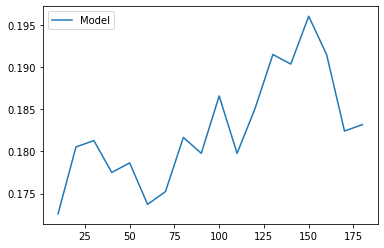

In [9]:
learning_curve_cv.plot(y = 'Model')

It is very jumpy however there seems to be a peak at around 150 months. 

Lets get both methods plotted on the same axis

In [10]:
learning_curve_default['method'] = 'default'
learning_curve_cv['method'] = 'cv'
all_data = pd.concat([learning_curve_default, learning_curve_cv])
all_data

,Model,Benchmark,Races,Features,Training Time,method
10,0.174471,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",12.329937,default
20,0.187311,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",13.403444,default
30,0.183912,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",14.289901,default
40,0.182779,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",15.090551,default
50,0.191843,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",15.904832,default
60,0.186178,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",16.670036,default
70,0.180891,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",17.324283,default
80,0.180514,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",17.946499,default
90,0.179758,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",18.581993,default
100,0.184668,0.274169,2648,"pcnt_win, avg_stime, min_time, avg_time, pcnt_...",19.389442,default


Text(0, 0.5, 'Validation Accuracy')

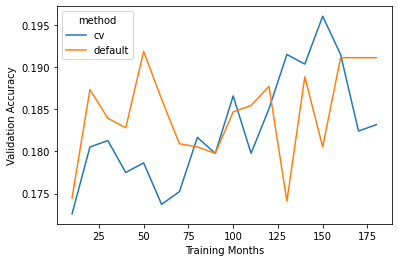

In [12]:
ax = all_data.pivot(columns = 'method', values = 'Model').plot()
ax.set_xlabel("Training Months")
ax.set_ylabel("Validation Accuracy")

It appears that the cross validation method benefits more from receiving more data than the default parameters. This is most likely due to the fact that the default method trains for a fixed number of iterations, where as the cross validation method will keep training until the validation loss stops decreasing